In [90]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [201]:
from wavelets import *
from draws import *
from chaos_searh import *
from BP_dynamics import *
import pywt
plt.rcParams.update({'font.size': 25})

Общее описание задачи:

Гиппокамп состоит из разных типов нейронов. Взаимодействия (через синапсы) между ними порождают различные ритмические осцилляции: это может быть гамма-ритм (30-120(?)Гц), тета-ритм(4-7 Гц) и тета-гамма-ритм. При изменении концентраций ионов в синаптической щели, потенциала или других параметров системы нейронов, могут происходить переходы между данными режимами. 

Ранее было продемонстрировано, что минимальный набор для воспроизведения данных режимов состоит из 4 клеток: двух OLM-клеток, баскет-клетки и пирамидальной клетки. Такая система была исследована в работе (ссылка). ____

Мотивация изучения системы из 2 клеток: баскет и пирамидальной (BP): ________________

Для описания динамики нейронов часто используют различные модификации уравнений Ходжкина_Хаксли, в том числе система уравнений Фитц-Хью Нагумо (ФХН). ФХН для системы BP будет выглядеть следующим образом:

\begin{equation}
 \begin{cases}
   \dot v = v_i - {v_i^3}/{3} - u_i + I_{ext}\delta_{i,P} + \sum_j{I_{syn}^{ji}}, 
   \\
   \dot u = \epsilon_i(v_i + a  - u_{i})
 \end{cases}
\end{equation}

А связь описывается так:

\begin{equation}
 \begin{cases}
   I^{ji}_{syn} = G_{ji}s_{ji}(E_{ex, in} - v_{i}), 
   \\
   \dot s = A/2(1 + tanh({v_j}/{v_{vsl}}))(1 - s_{ji}) - Bs_{ji}
 \end{cases}
\end{equation}

Важно: ток подается только на пирамидальную клетку!

НА ОСНОВАНИИ ЧЕГО БЫЛА ПОСТРОЕНА КАРТА МУЛЬТИСТАБИЛЬНОСТИ?

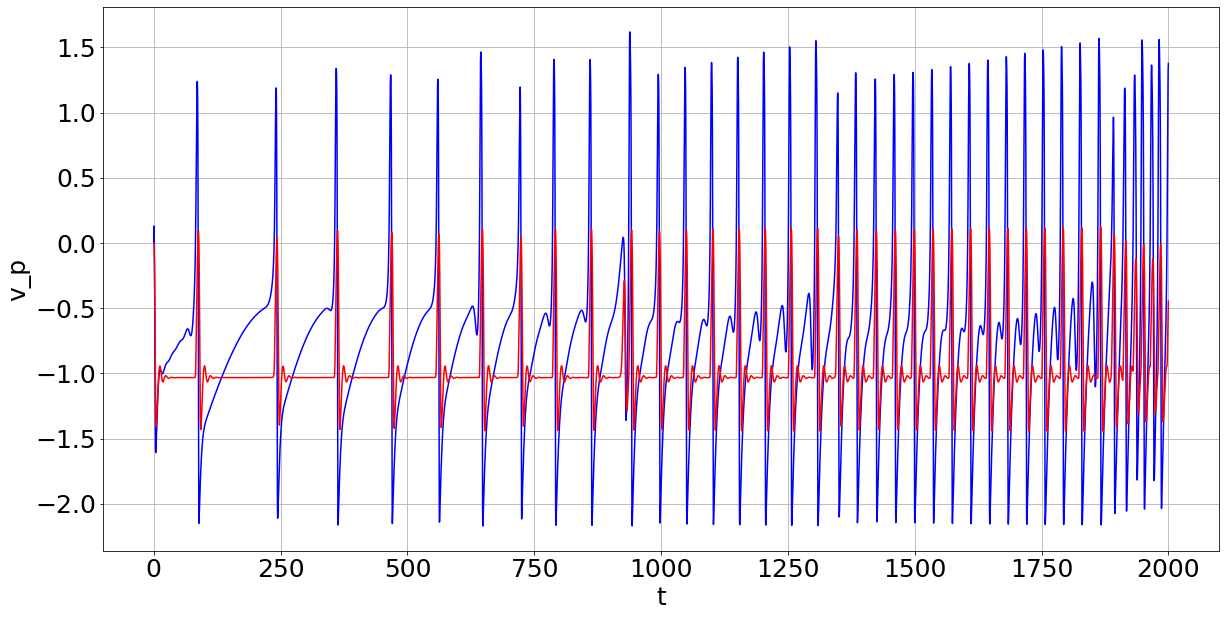

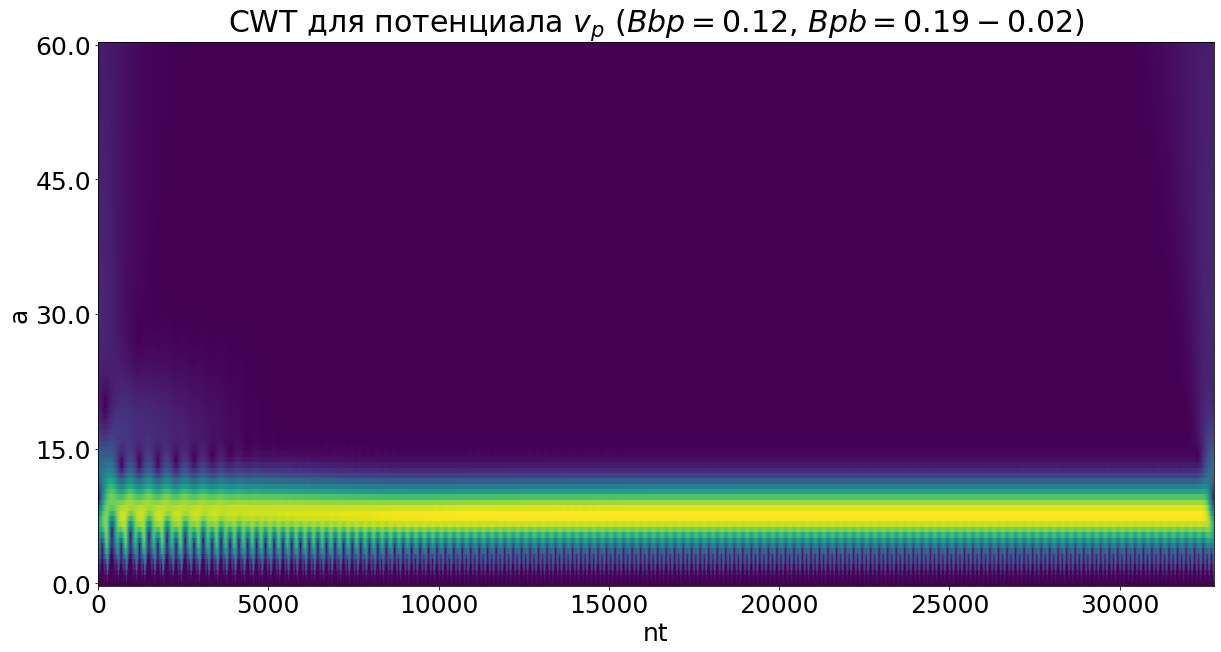

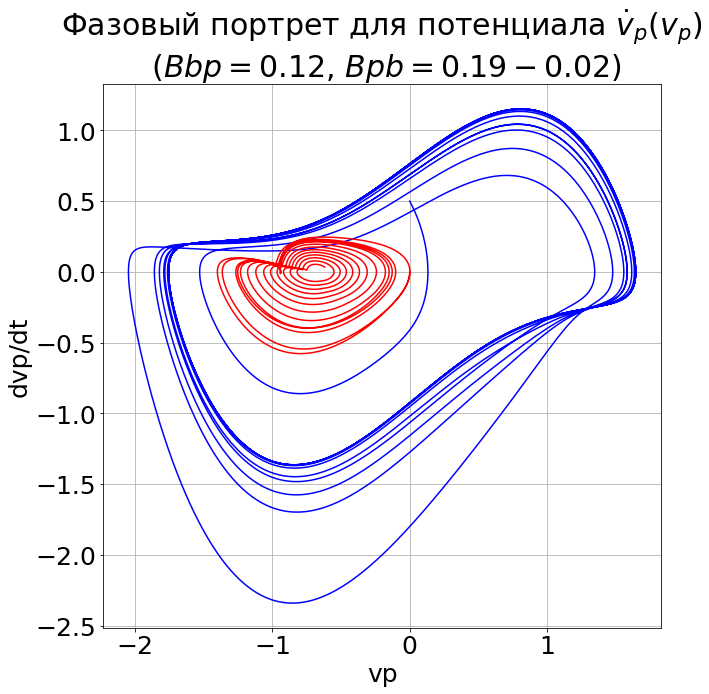

In [177]:
Iext = 0.5 # возбуждающий импульс на пирамидальную клетку (P)
G = 0.5 # проводимость мембран -- определяют относительный вклад клетки в динамику ансамбля
Eex = 0 # напряжение на выходной клетке (P) -- для активаторной, возбуждающей клетки
Ein = -5 # напряжение на входной клетке (B) -- для ингибиторной, тормозящей клетки
eps = 0.3 # временной масштаб осцилляций (отношение быстрой переменной к медленной)
a = 0.5 # параметры кинетики суммарного ионного тока u
b = 0.8 # параметры кинетики суммарного ионного тока u
A = 1 # синаптический параметр
Bpb = 0.19 # синаптический параметр
Bbpmin = 0.02 # синаптический параметр
Bbpmax = 0.12 # синаптический параметр
vsl = 0.1 # синаптический параметр (открытие синапсов быстрее чем закрытие)


scale = np.linspace(0, 60, 101)

args1 = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbpmin, Bbpmax, vsl)


signal_draw1(args1, vp0=0, vb0=0, up0=0, ub0=0, sbp0=0, spb0=0, ts=2000, nt=2**15)

wavelet_draw(args1, scale, ts=2000, nt=2**15)

phase_portrait(args1, vp0=0, vb0=0, up0=0, ub0=0, sbp0=0, spb0=0, ts=200, nt=2**15)

In [99]:
Iext = 0.5 # возбуждающий импульс на пирамидальную клетку (P)
G = 0.5 # проводимость мембран -- определяют относительный вклад клетки в динамику ансамбля
Eex = 0 # напряжение на выходной клетке (P) -- для активаторной, возбуждающей клетки
Ein = -5 # напряжение на входной клетке (B) -- для ингибиторной, тормозящей клетки
eps = 0.3 # временной масштаб осцилляций (отношение быстрой переменной к медленной)
a = 0.5 # параметры кинетики суммарного ионного тока u
b = 0.8 # параметры кинетики суммарного ионного тока u
A = 1 # синаптический параметр
vsl = 0.1 # синаптический параметр (открытие синапсов быстрее чем закрытие)

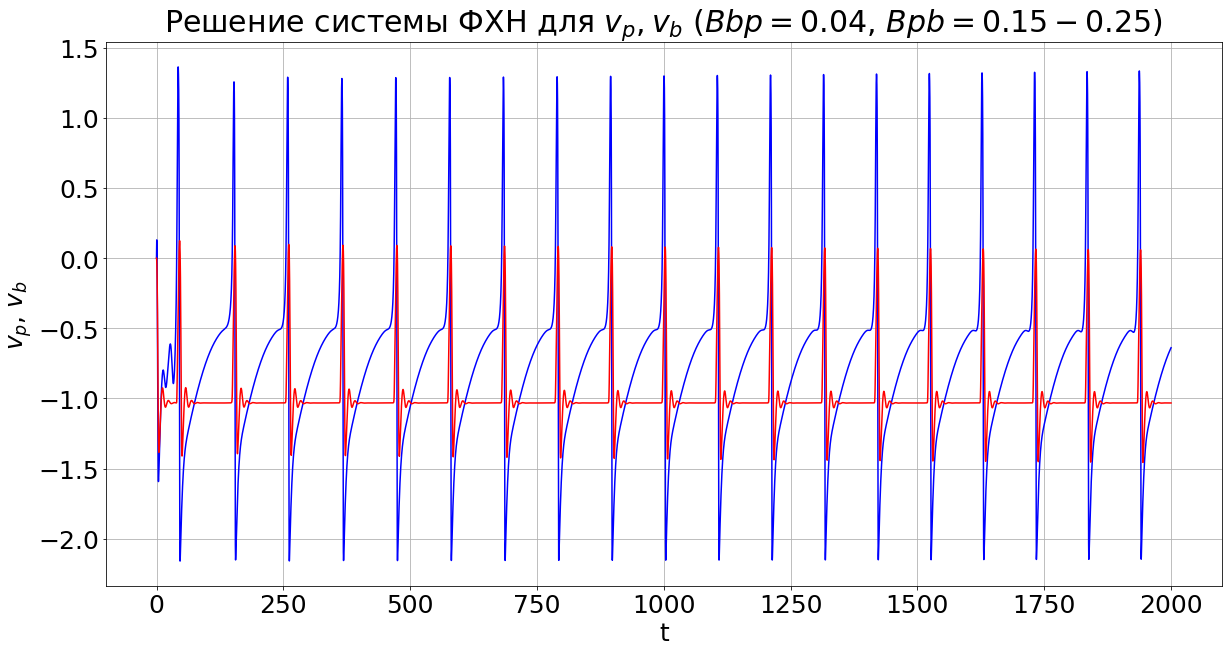

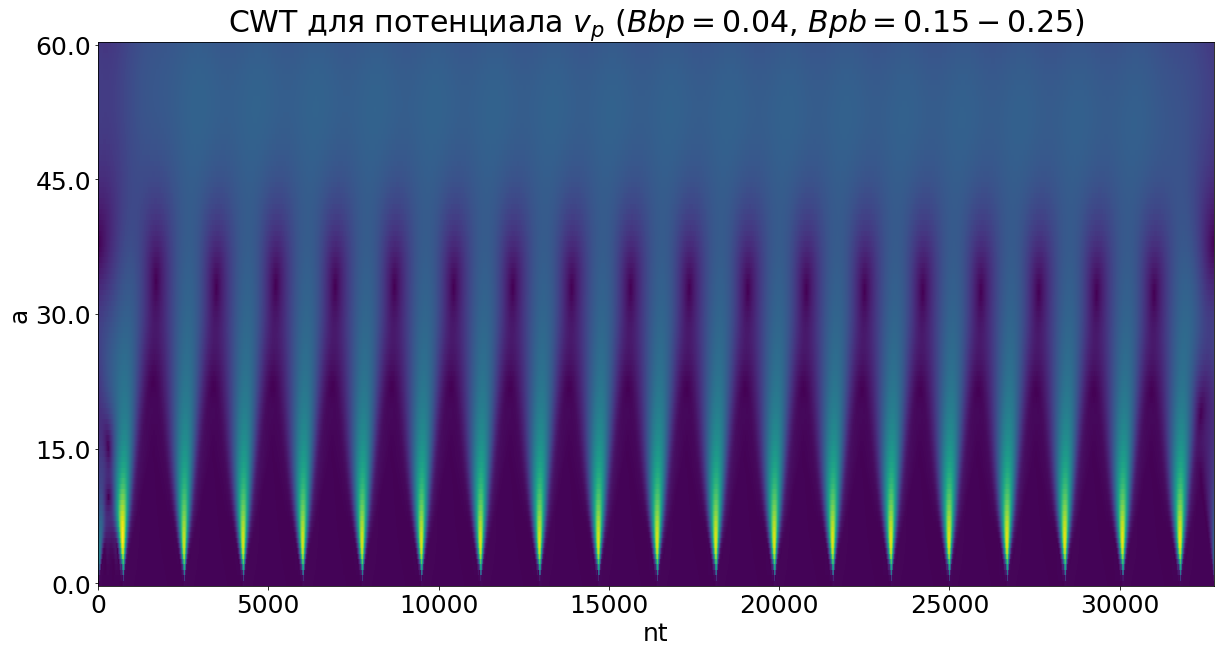

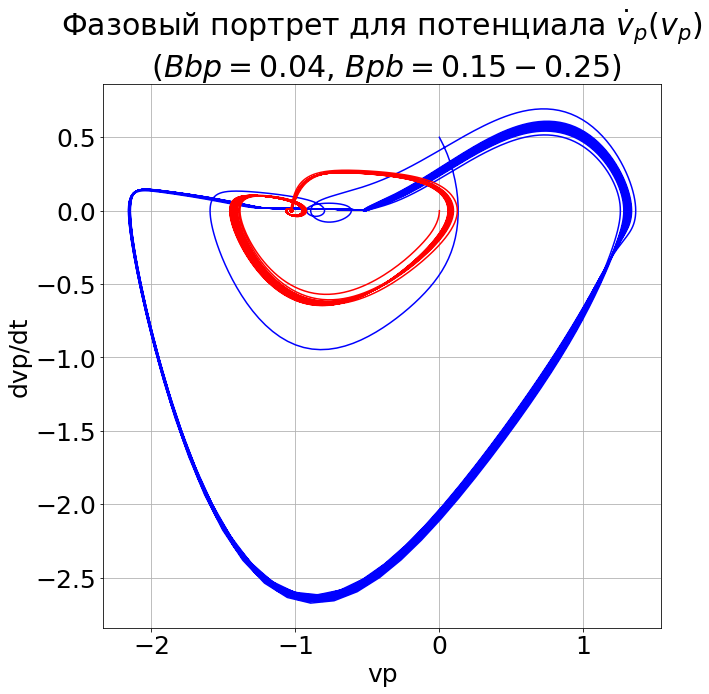

In [98]:
Bbp = 0.04 # синаптический параметр
Bpbmin = 0.15 # синаптический параметр
Bpbmax = 0.25 # синаптический параметр
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)


signal_draw2(args2, vp0=0, vb0=0, up0=0, ub0=0, sbp0=0, spb0=0, ts=2000, nt=2**15)

wavelet_draw(args2, scale, ts=2000, nt=2**15)

phase_portrait(args2, vp0=0, vb0=0, up0=0, ub0=0, sbp0=0, spb0=0, ts=2000, nt=2**15)

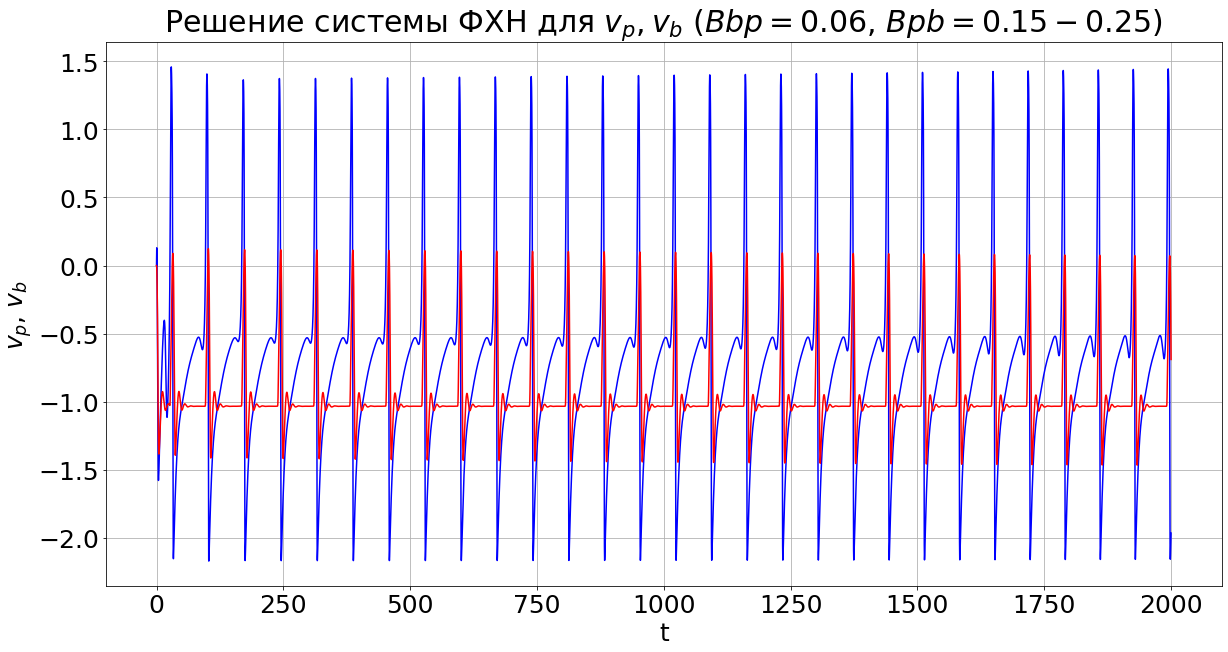

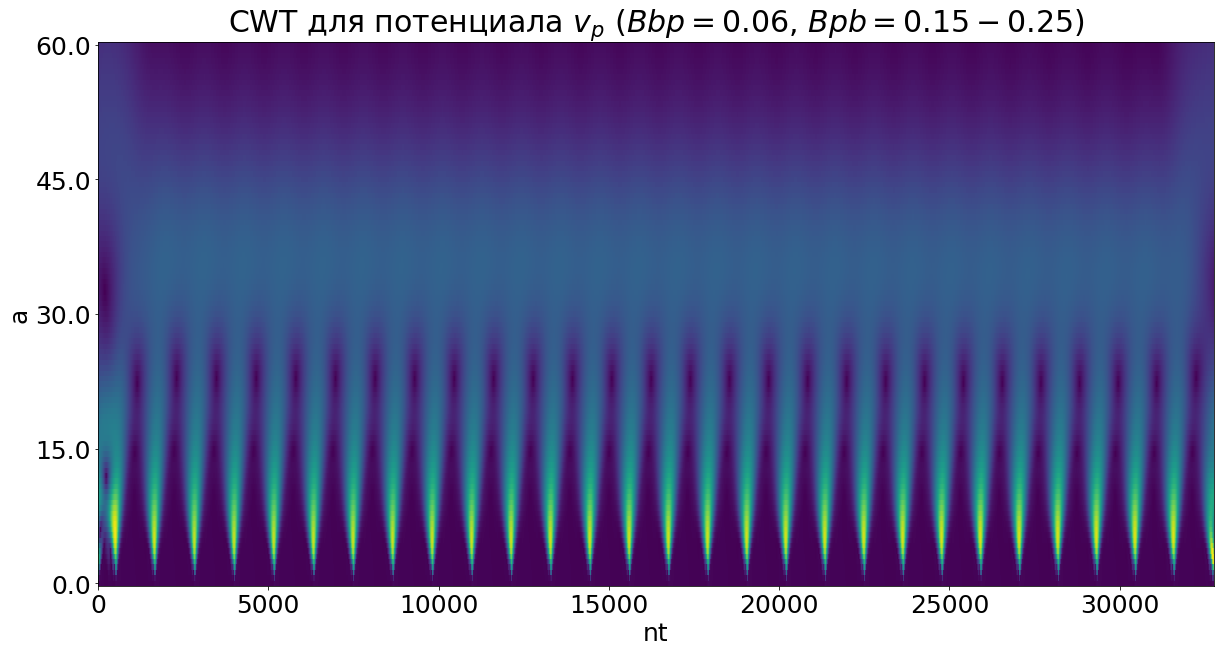

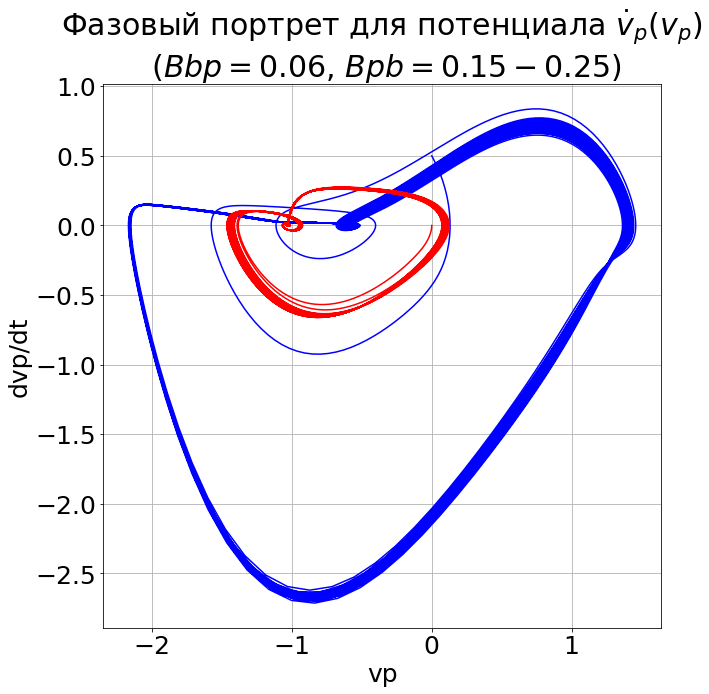

In [96]:
Bbp = 0.06 # синаптический параметр
Bpbmin = 0.15 # синаптический параметр
Bpbmax = 0.25 # синаптический параметр
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)


signal_draw2(args2, vp0=0, vb0=0, up0=0, ub0=0, sbp0=0, spb0=0, ts=2000, nt=2**15)

wavelet_draw(args2, scale, ts=2000, nt=2**15)

phase_portrait(args2, vp0=0, vb0=0, up0=0, ub0=0, sbp0=0, spb0=0, ts=2000, nt=2**15)

1. В докторской глава2
2. С уменьшением шага по параметру исследовать область переходов на 0.08 и 0.1, построить вейвлеты
при варьировании ну надо брать отрицательные потенциалы (V=-2;2), а ток посмотреть положительный
3. Посмотреть на сосуществующие аттракторы (начальные условия поварьировать) построить графики
4. Отослать файл с гистерезисом

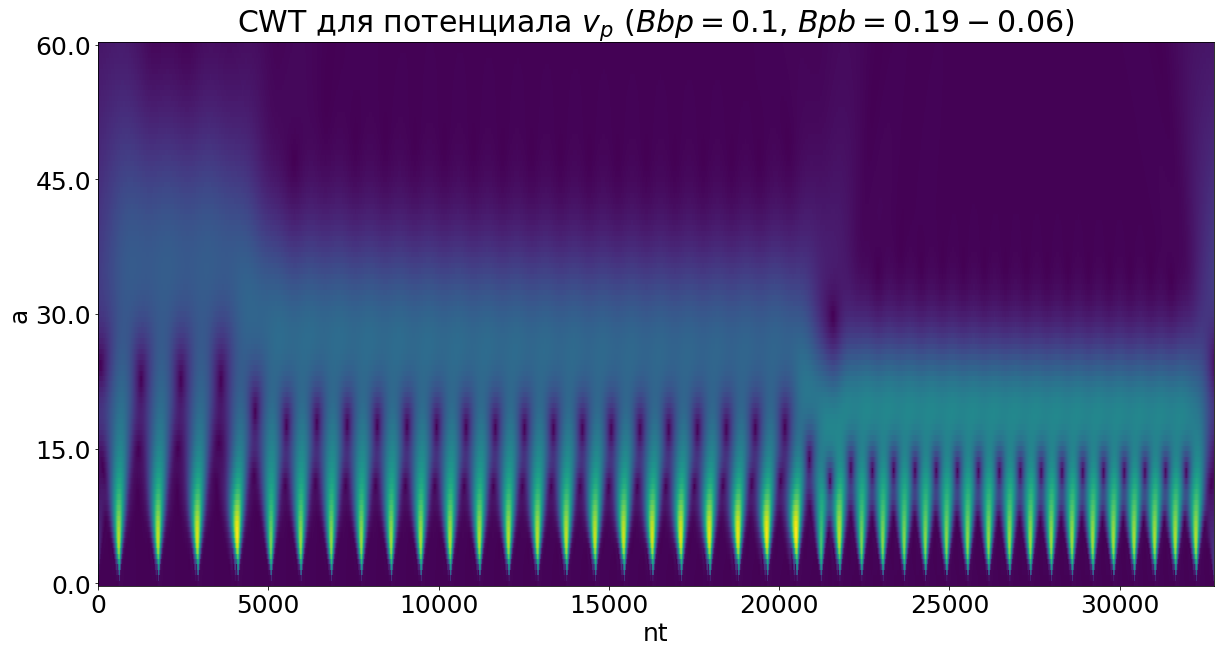

In [198]:
Iext = 0.5 # возбуждающий импульс на пирамидальную клетку (P)
G = 0.5 # проводимость мембран -- определяют относительный вклад клетки в динамику ансамбля
Eex = 0 # напряжение на выходной клетке (P) -- для активаторной, возбуждающей клетки
Ein = -5 # напряжение на входной клетке (B) -- для ингибиторной, тормозящей клетки
eps = 0.3 # временной масштаб осцилляций (отношение быстрой переменной к медленной)
a = 0.5 # параметры кинетики суммарного ионного тока u
b = 0.8 # параметры кинетики суммарного ионного тока u
A = 1 # синаптический параметр
Bpb = 0.19 # синаптический параметр
Bbpmin = 0.06 # синаптический параметр
Bbpmax = 0.1 # синаптический параметр
vsl = 0.1 # синаптический параметр (открытие синапсов быстрее чем закрытие)


scale = np.linspace(0, 60, 101)

args1 = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbpmin, Bbpmax, vsl)


# signal_draw1(args1, vp0=0, vb0=0, up0=0, ub0=0, sbp0=0, spb0=0, ts=1000, nt=2**15)

args = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbpmin, vsl)
sol, t = calcODE(args, *(4 * np.random.random(6) - 2), 2000, 2**15)
                 
wavelet_draw(args1, scale, *sol[-1], ts=2000, nt=2**15)

# phase_portrait(args1, vp0=0, vb0=0, up0=0, ub0=0, sbp0=0, spb0=0, ts=2000, nt=2**15)

[5 5 5 ... 5 5 5]


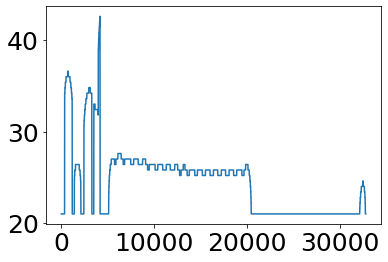

In [185]:
Iext = 0.5 # возбуждающий импульс на пирамидальную клетку (P)
G = 0.5 # проводимость мембран -- определяют относительный вклад клетки в динамику ансамбля
Eex = 0 # напряжение на выходной клетке (P) -- для активаторной, возбуждающей клетки
Ein = -5 # напряжение на входной клетке (B) -- для ингибиторной, тормозящей клетки
eps = 0.3 # временной масштаб осцилляций (отношение быстрой переменной к медленной)
a = 0.5 # параметры кинетики суммарного ионного тока u
b = 0.8 # параметры кинетики суммарного ионного тока u
A = 1 # синаптический параметр
Bpb = 0.19 # синаптический параметр
Bbpmin = 0.06 # синаптический параметр
Bbpmax = 0.1 # синаптический параметр
vsl = 0.1 # синаптический параметр (открытие синапсов быстрее чем закрытие)

args1 = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbpmin, Bbpmax, vsl)
sol, t = calcODE1(args1, *(2 * np.random.random(6) - 4), 2000, 2**15)


scale = np.linspace(0, 60, 101)
w = fftMorlet(t, sol[:, 0], scale, np.pi)

print(np.argmax(np.abs(w), axis=0))
a_gr = scale[35:][np.argmax(np.abs(w[35:]), axis=0)]

plt.figure()
plt.plot(a_gr)

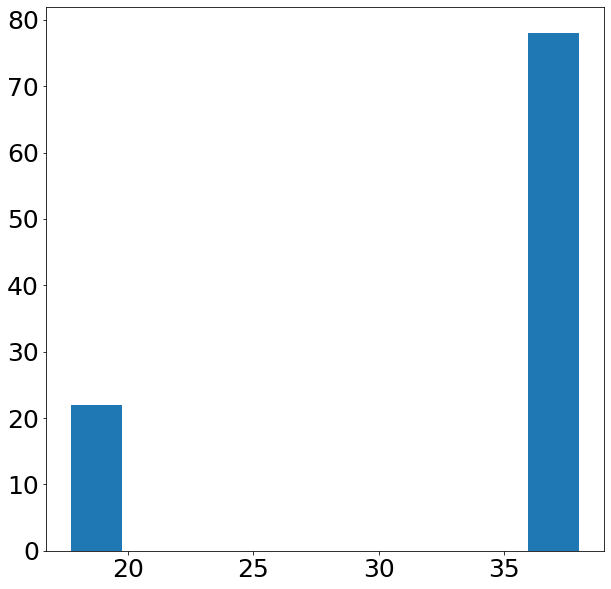

In [202]:
Bbp = 0.09 # синаптический параметр
Bpbmin = 0.19 # синаптический параметр
Bpbmax = 0.19 # синаптический параметр
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

T_of_attractors(args2, 100)

[13 13 13 ... 13 13 13]


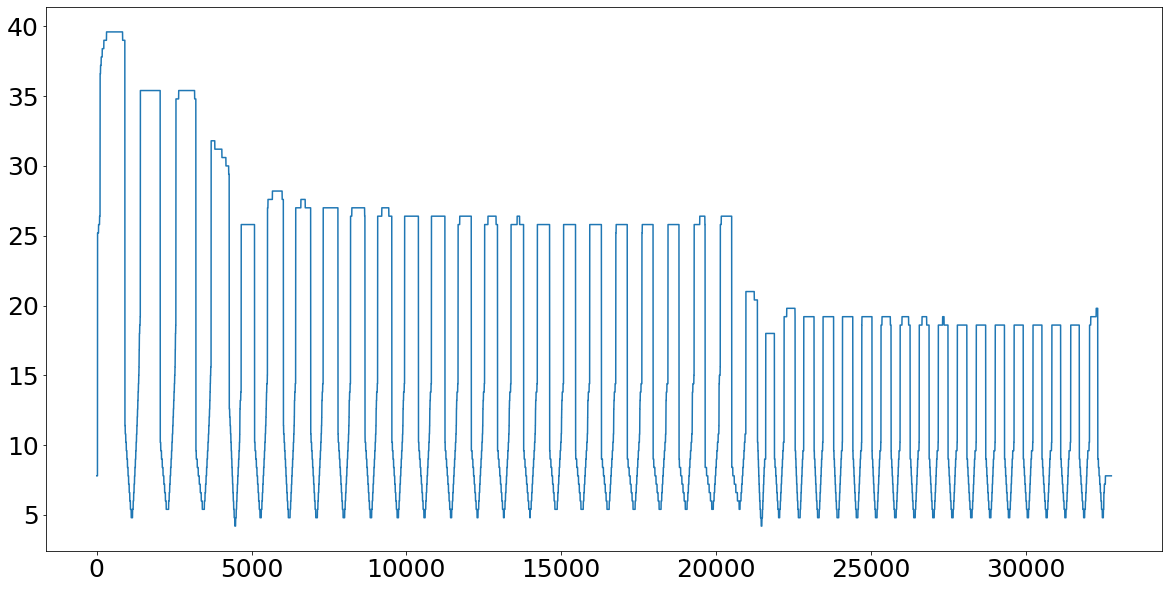

[13 13 13 ... 13 13 13]


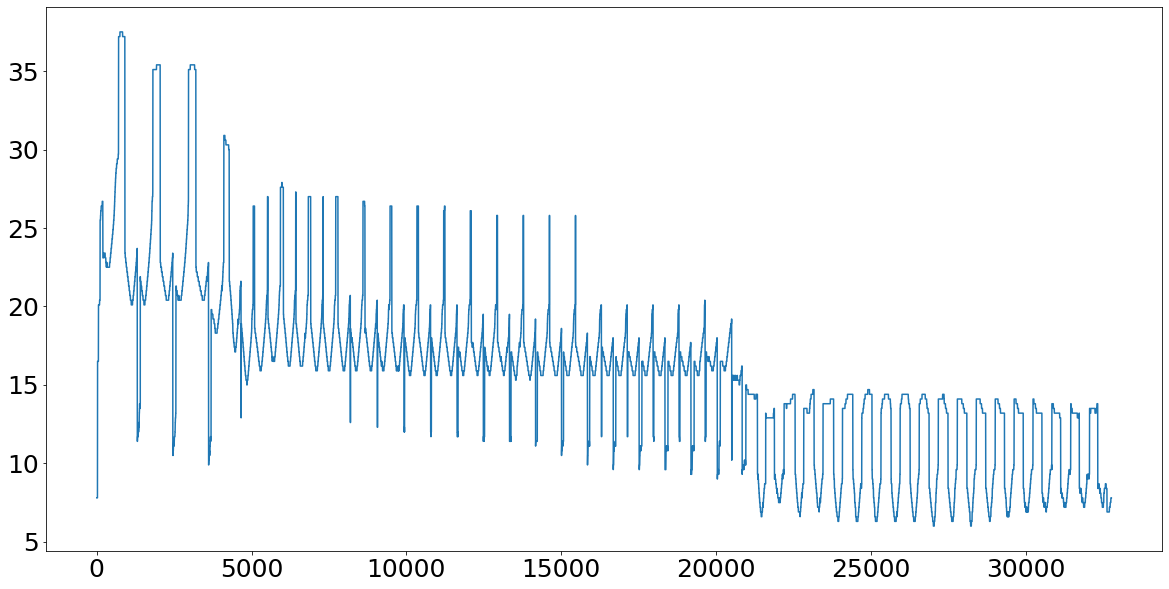

[40 40 40 ... 40 40 40]


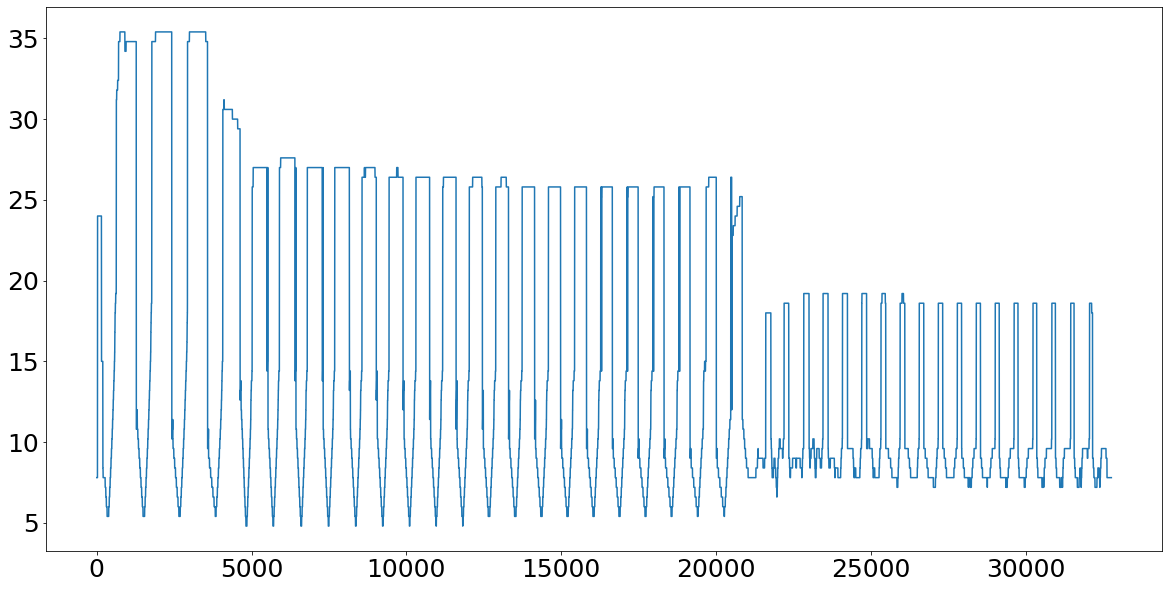

[18 18 18 ... 18 18 18]


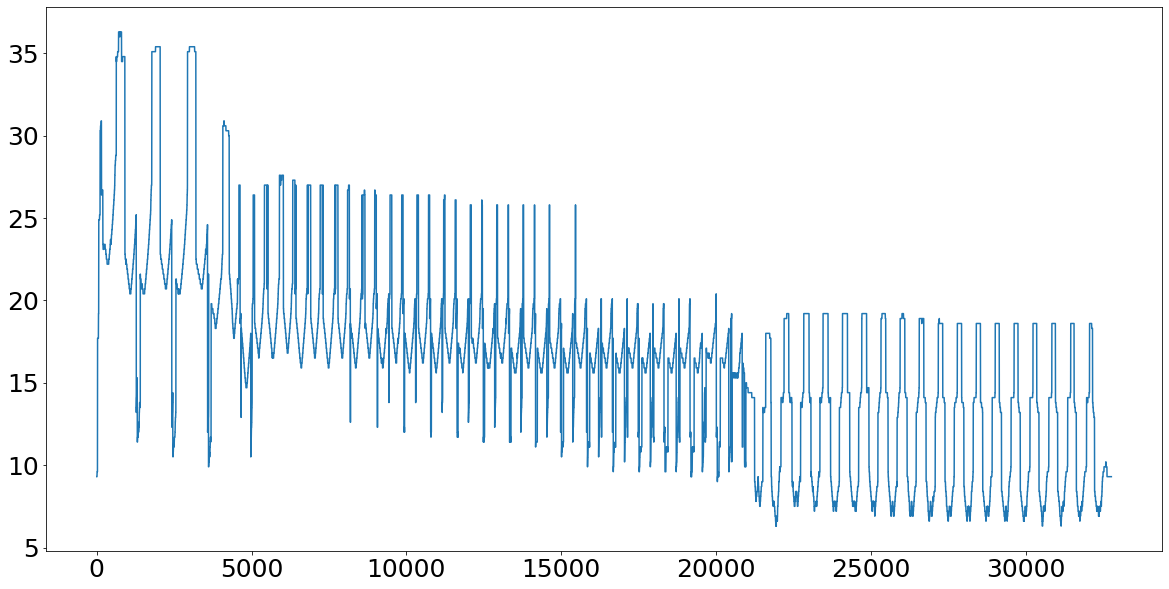

[20 20 20 ... 20 20 20]


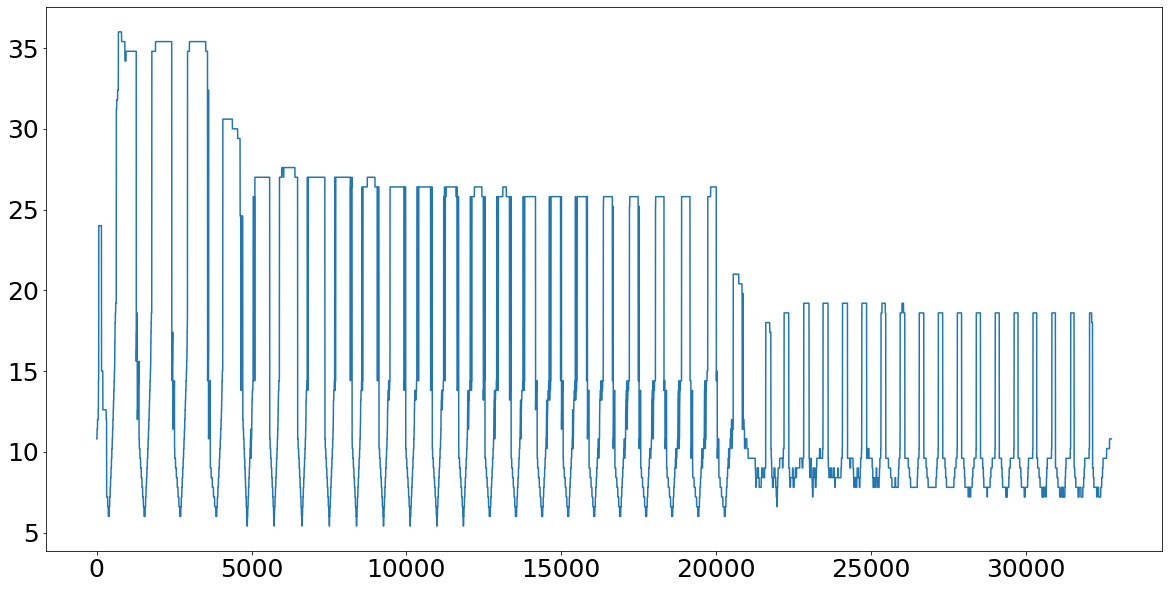

[56 56 56 ... 56 56 56]


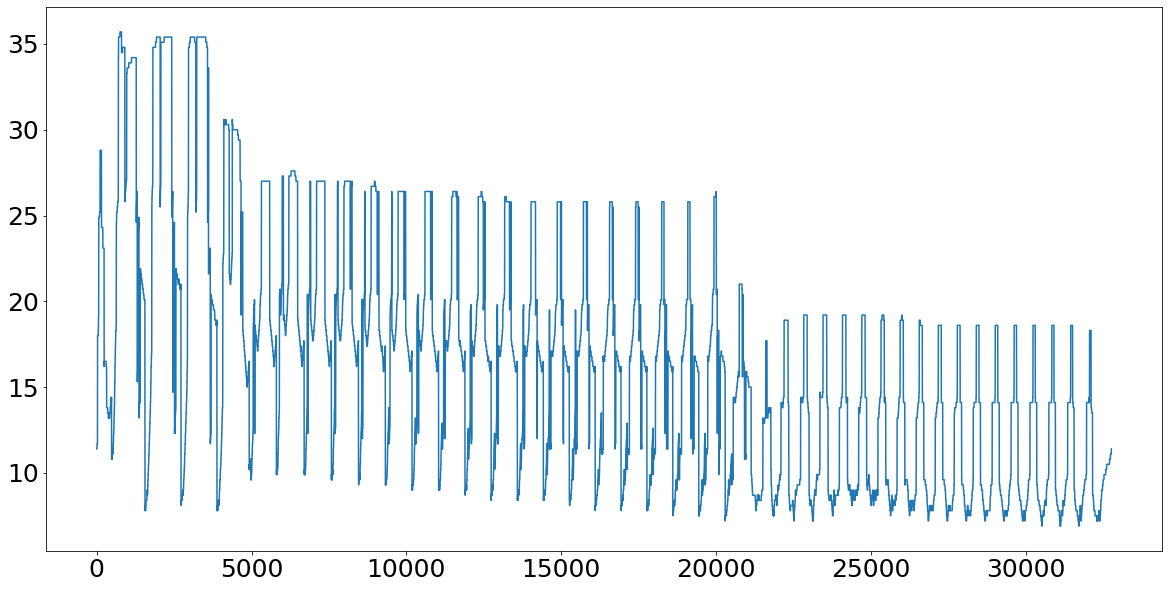

[14 14 14 ... 14 14 14]


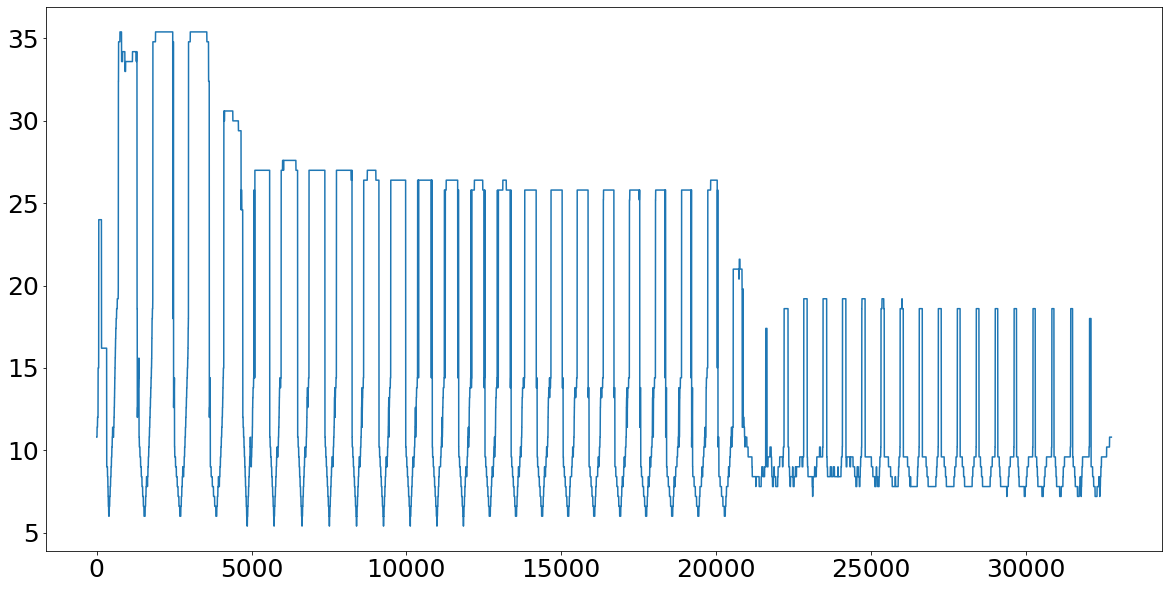

[6 6 6 ... 6 6 6]


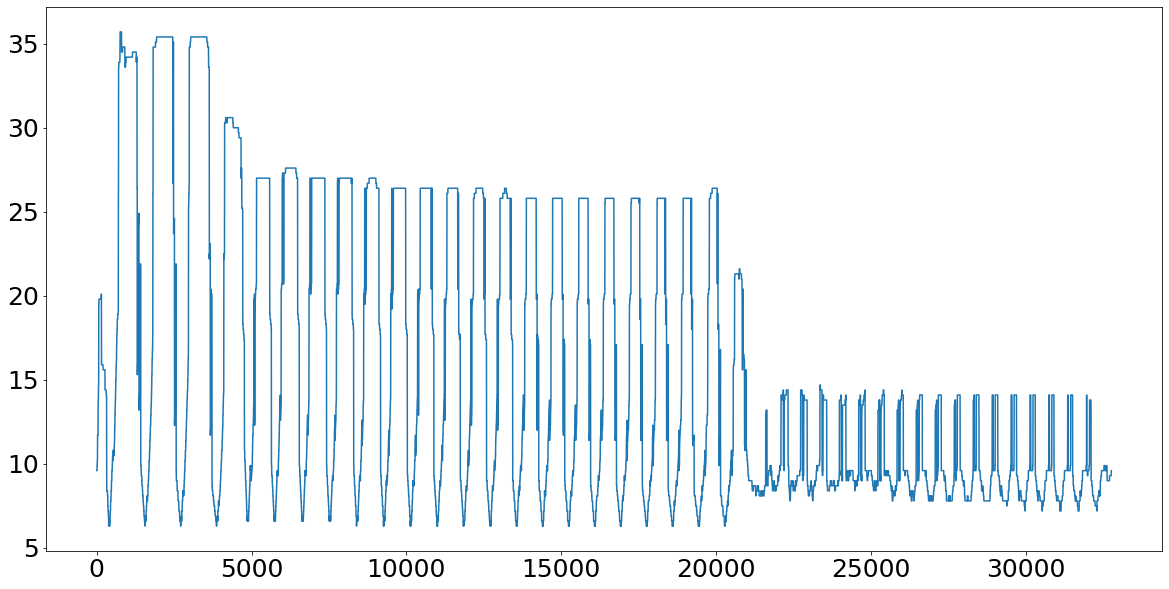

[19 19 19 ... 19 19 19]


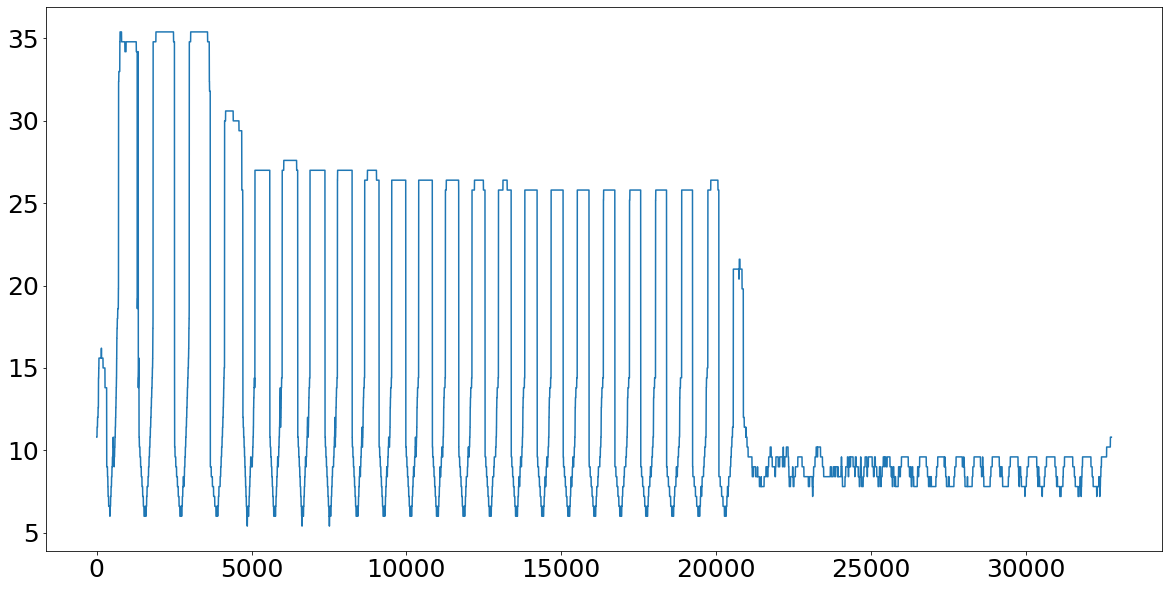

[56 56 56 ... 56 56 56]


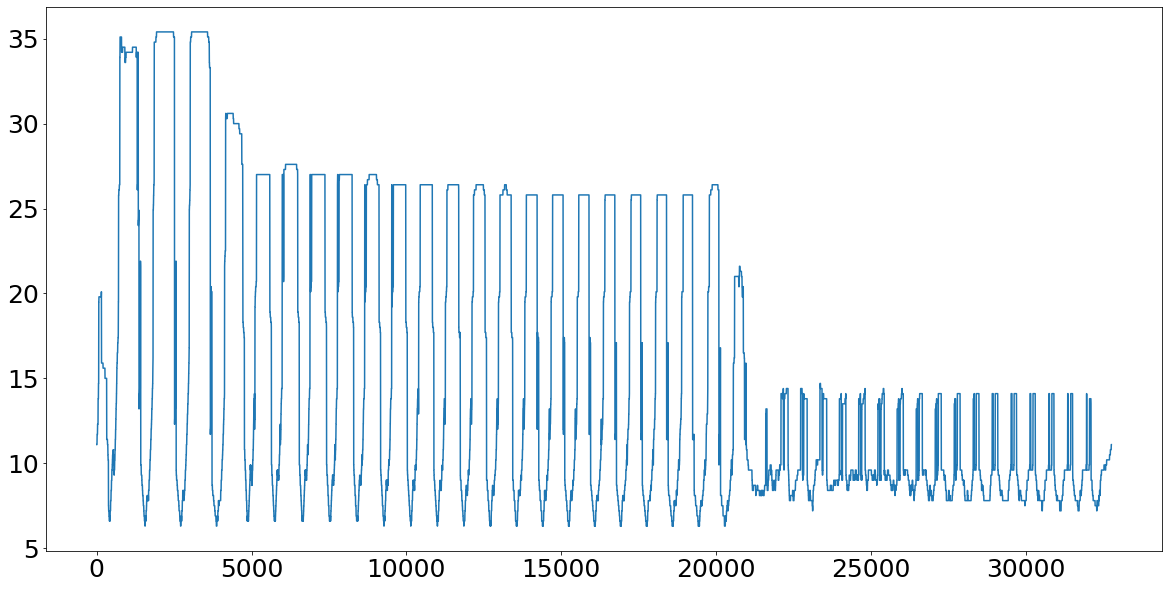

[12 12 12 ... 12 12 12]


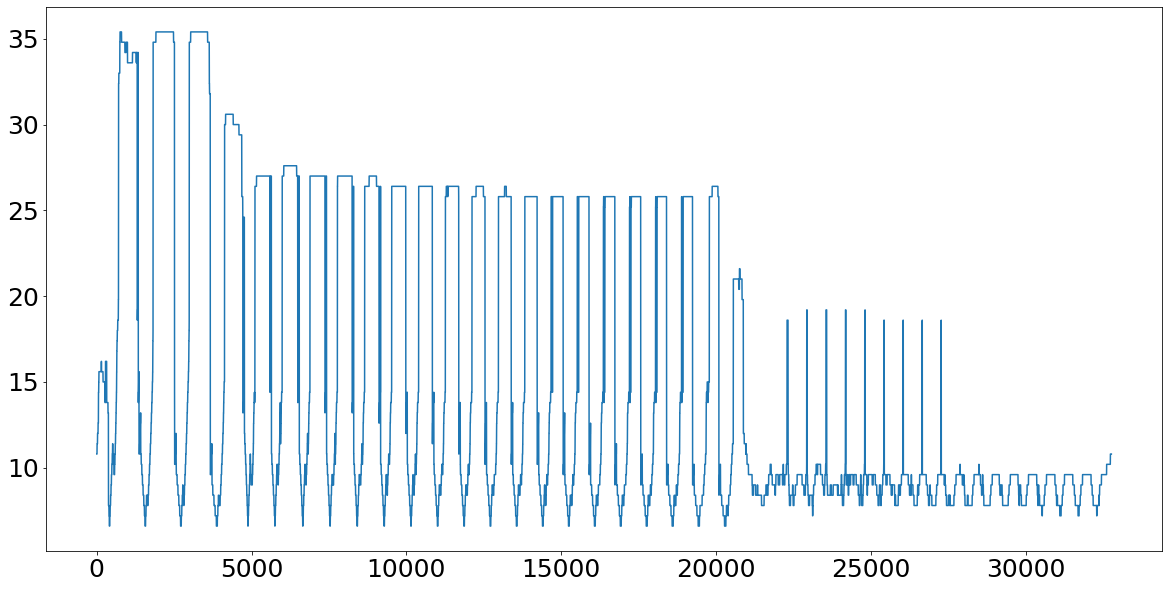

[20 20 20 ... 20 20 20]


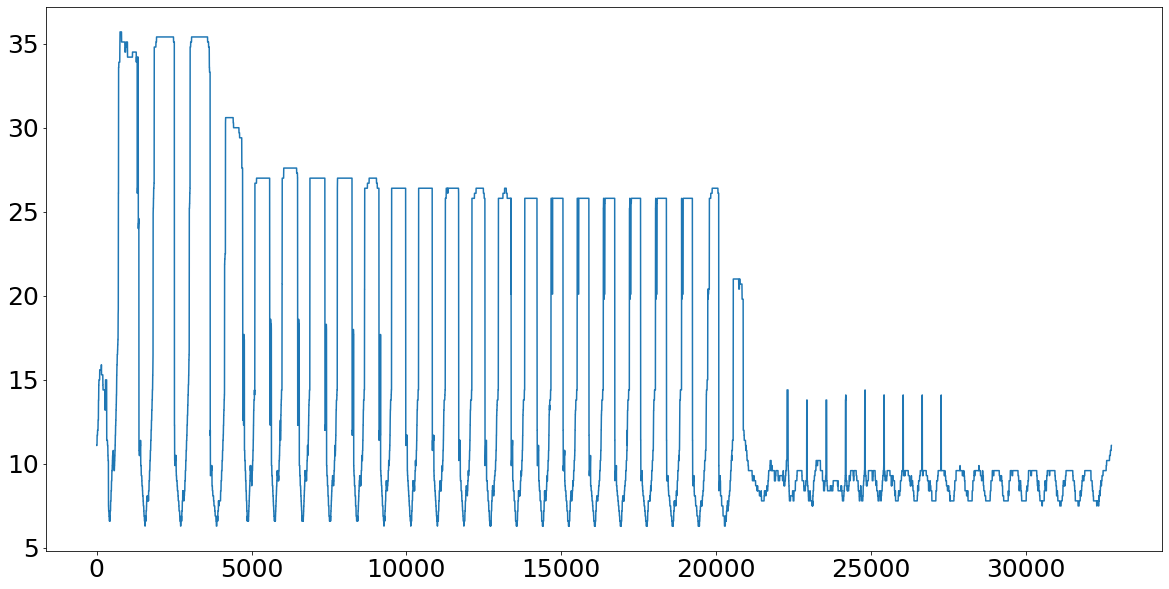

[12 12 12 ... 12 12 12]


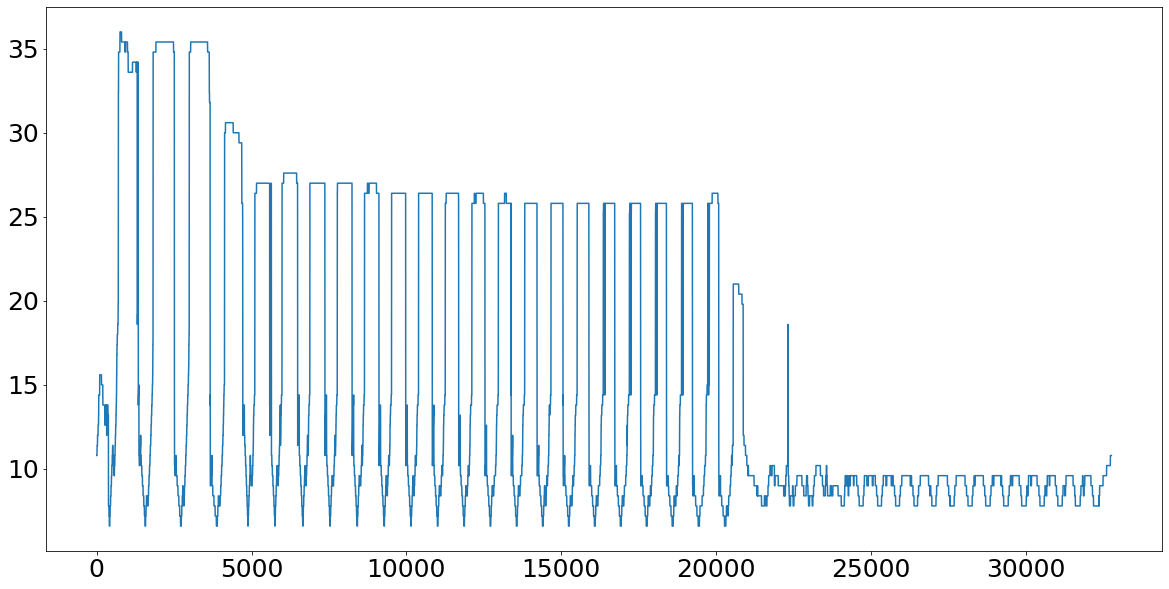

[15 15 15 ... 15 15 15]


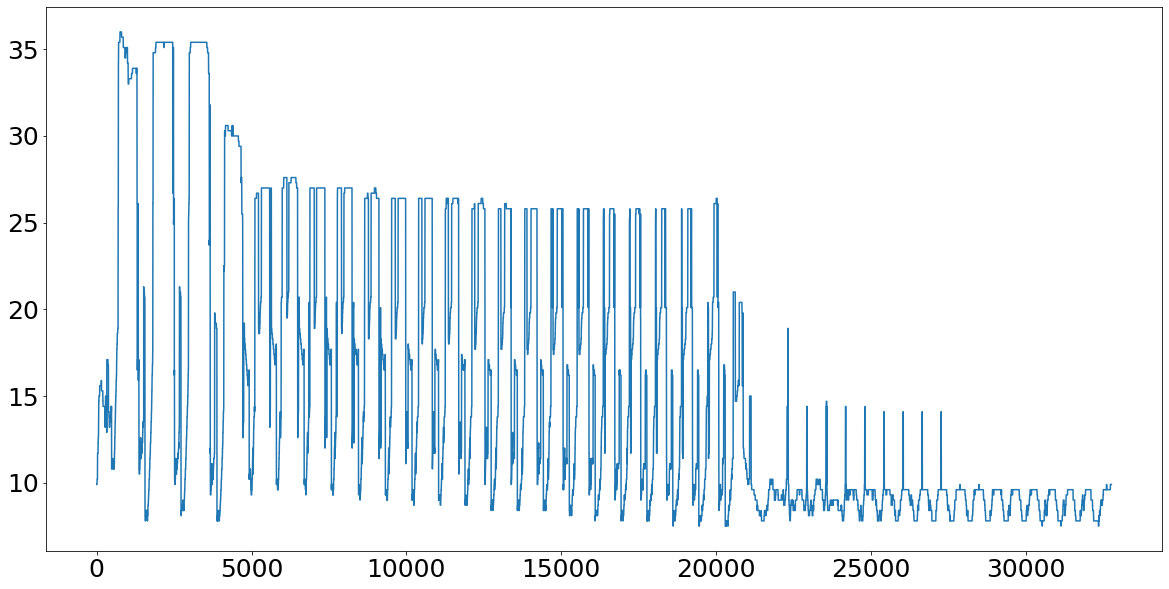

[12 12 12 ... 12 12 12]


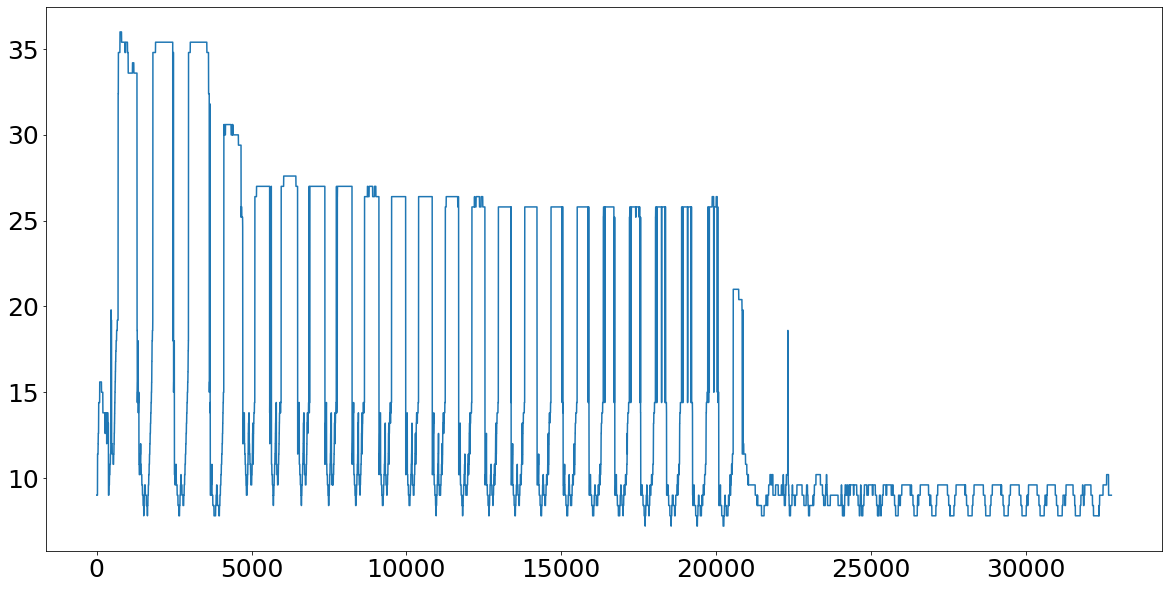

[31 31 31 ... 31 31 31]


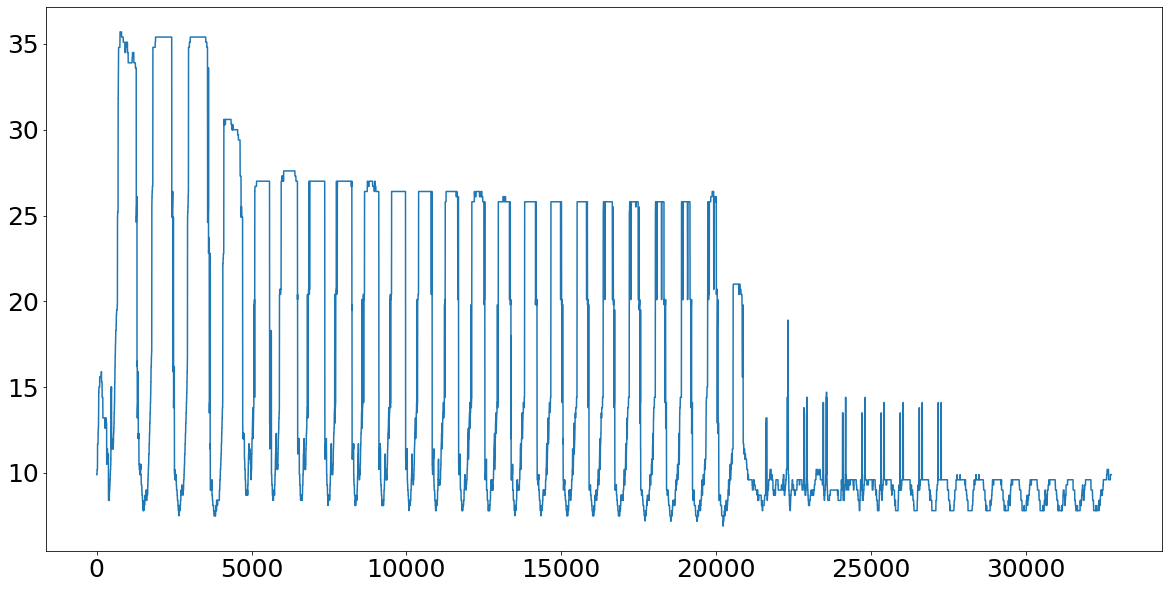

[20 20 20 ... 20 20 20]


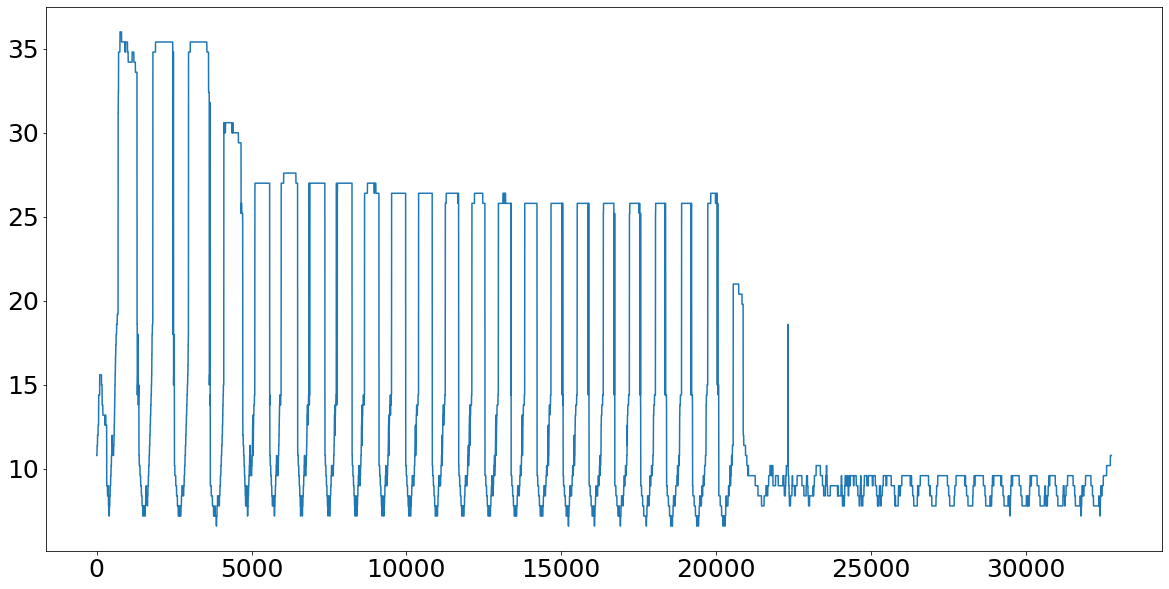

[20 20 20 ... 20 20 20]


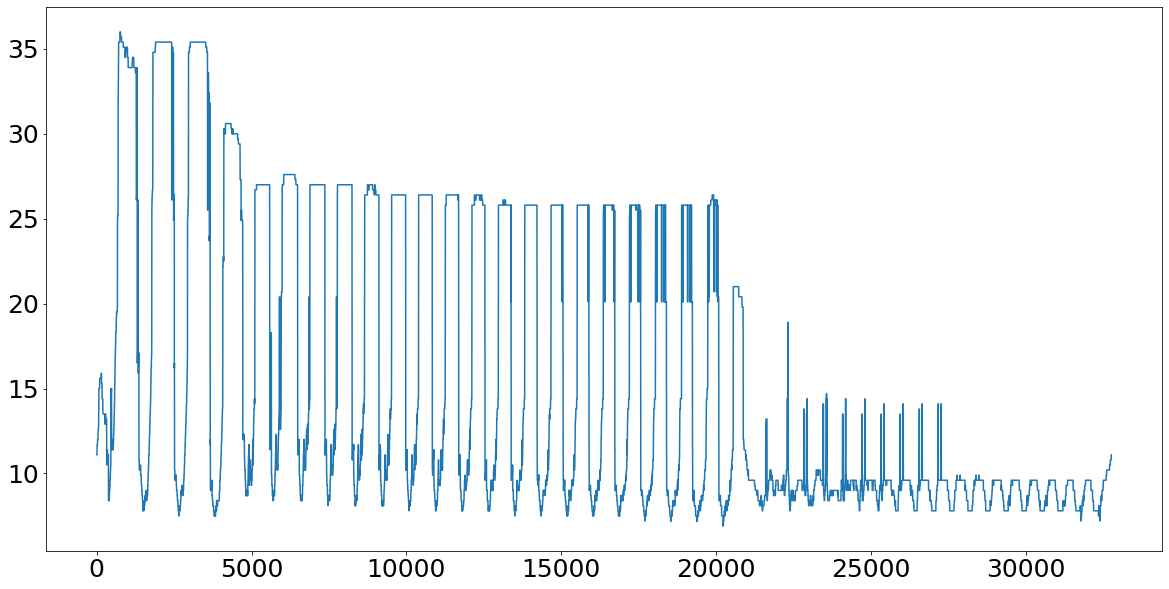

[20 20 20 ... 20 20 20]


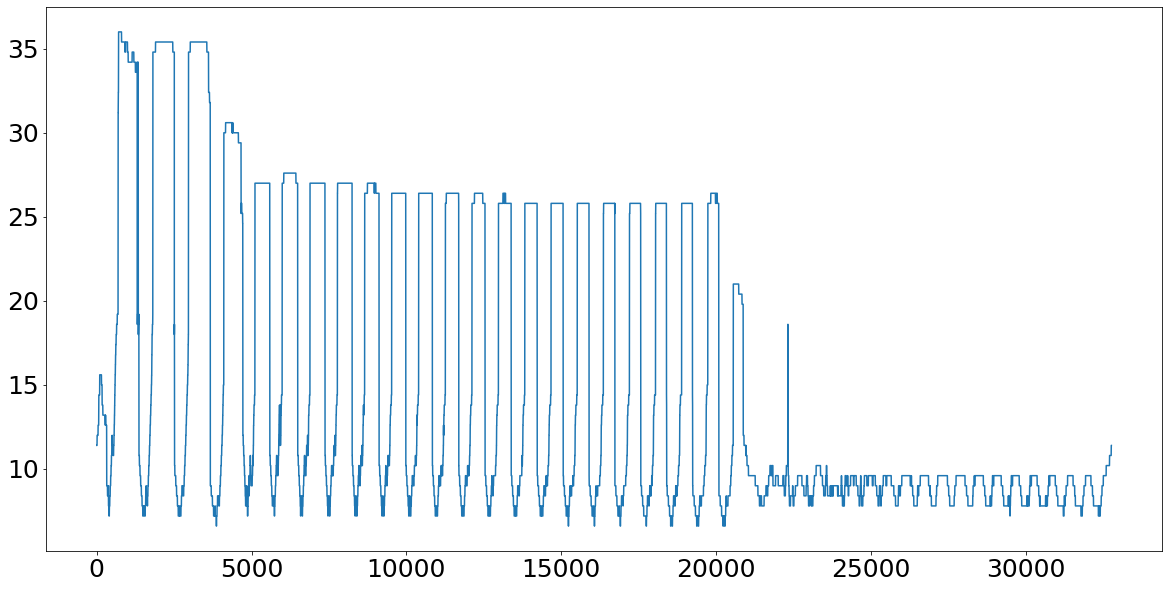

[9 9 9 ... 8 8 9]


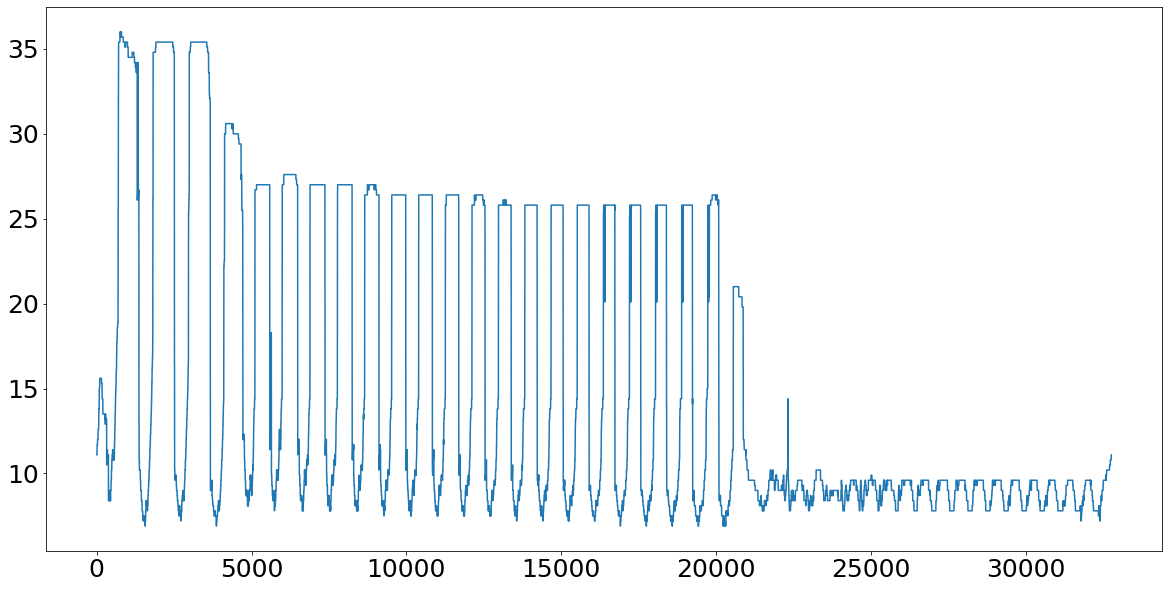

[14 14 14 ... 14 14 14]


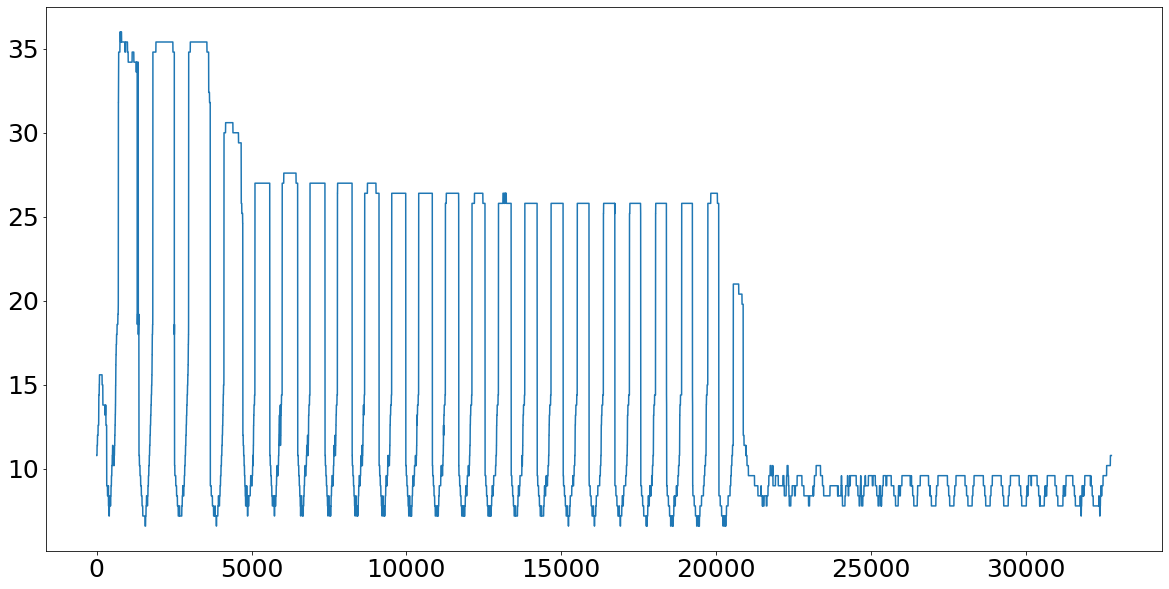

[15 15 15 ... 15 15 15]


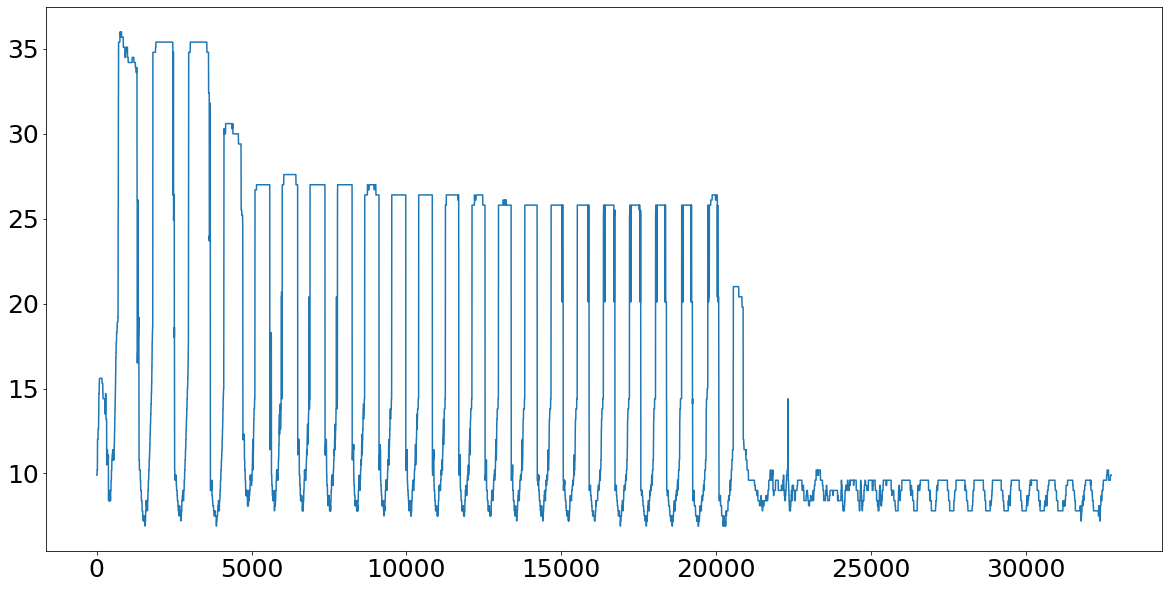

[15 15 15 ... 14 14 15]


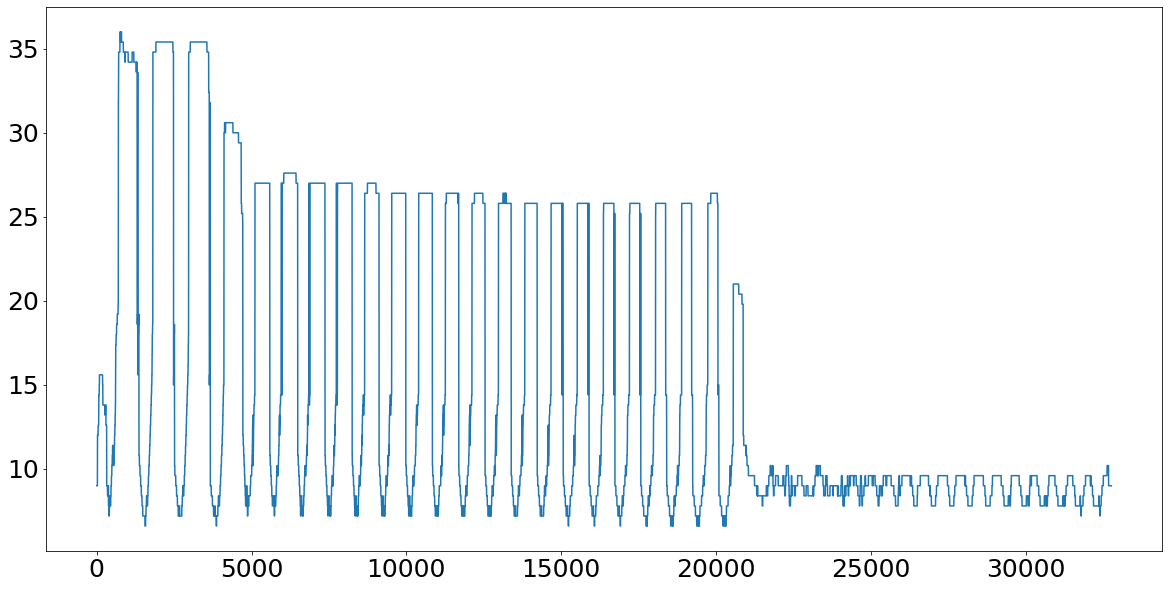

[56 56 56 ... 56 56 56]


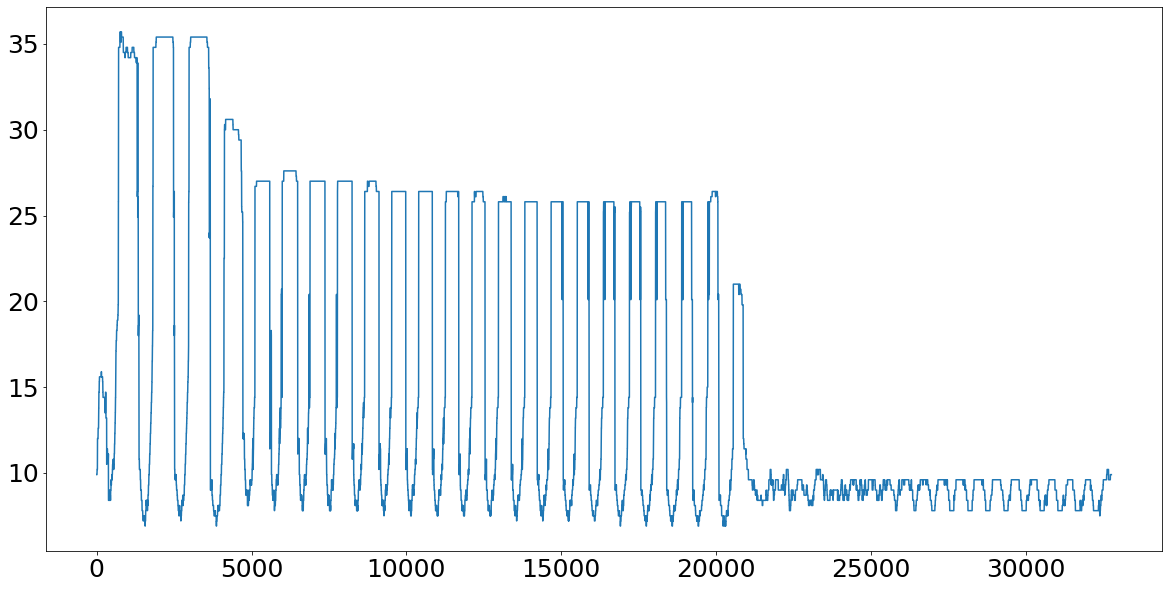

[13 13 13 ... 13 13 13]


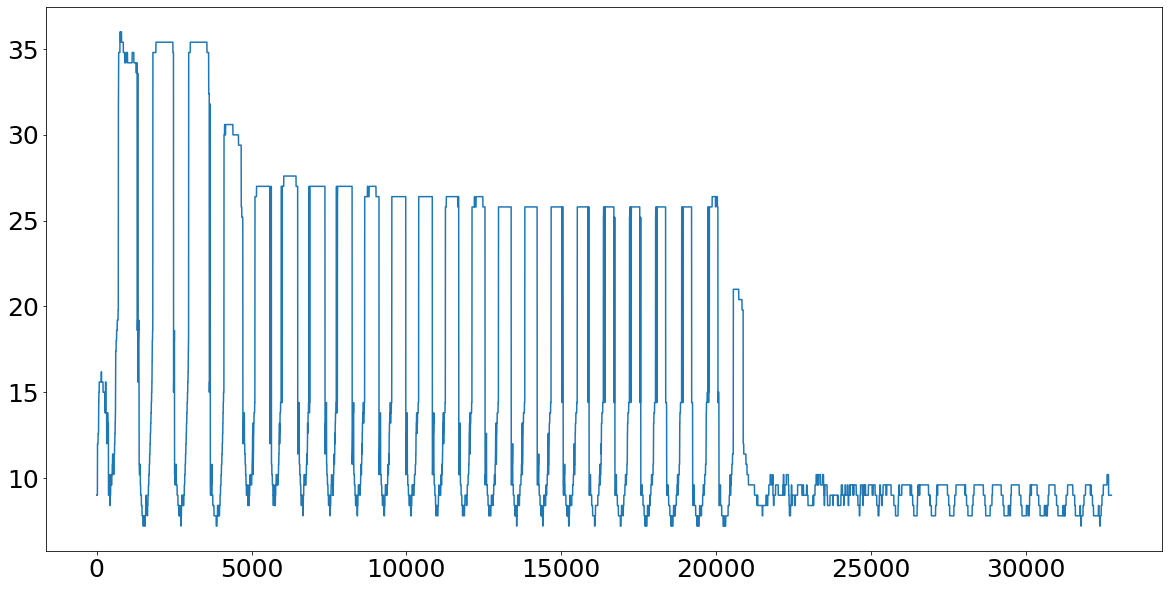

[14 14 14 ... 14 14 14]


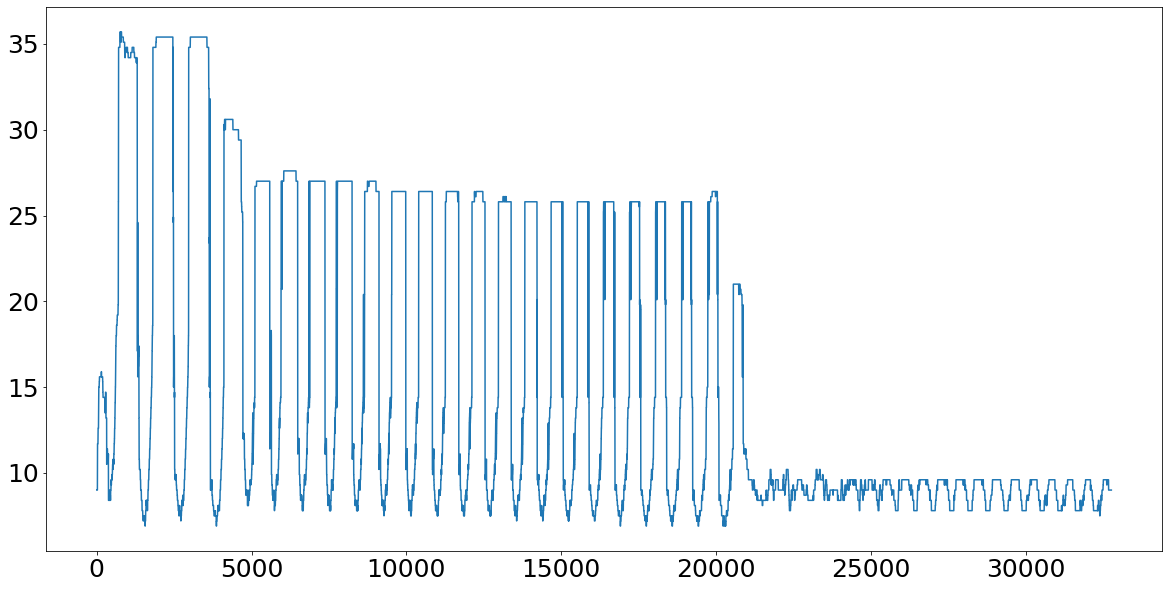

[13 13 13 ... 13 13 13]


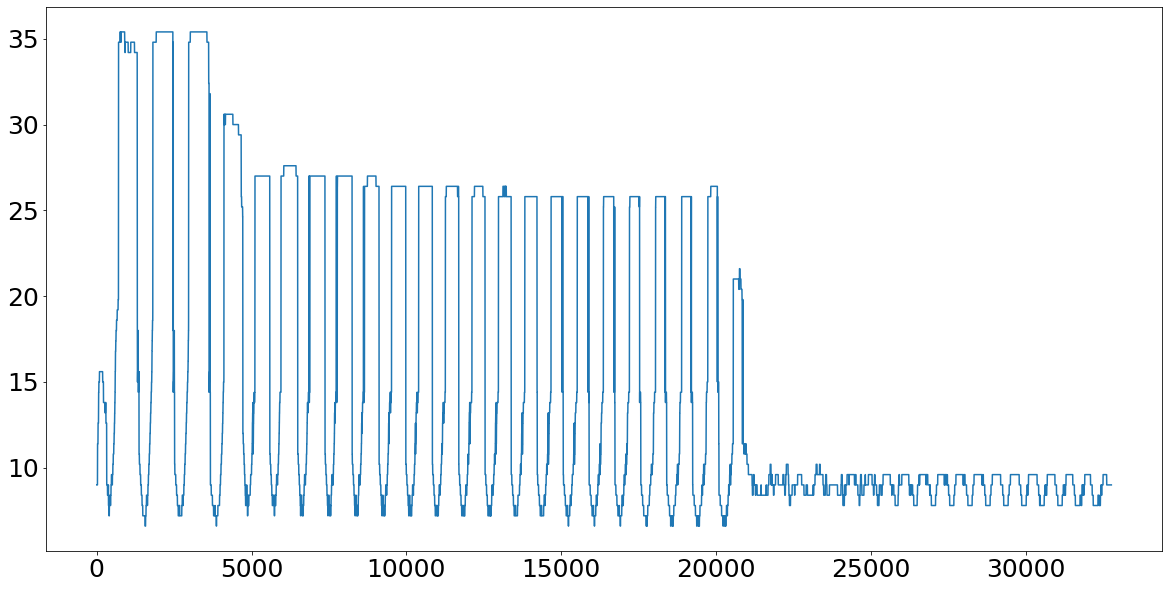

[56 56 56 ... 56 56 56]


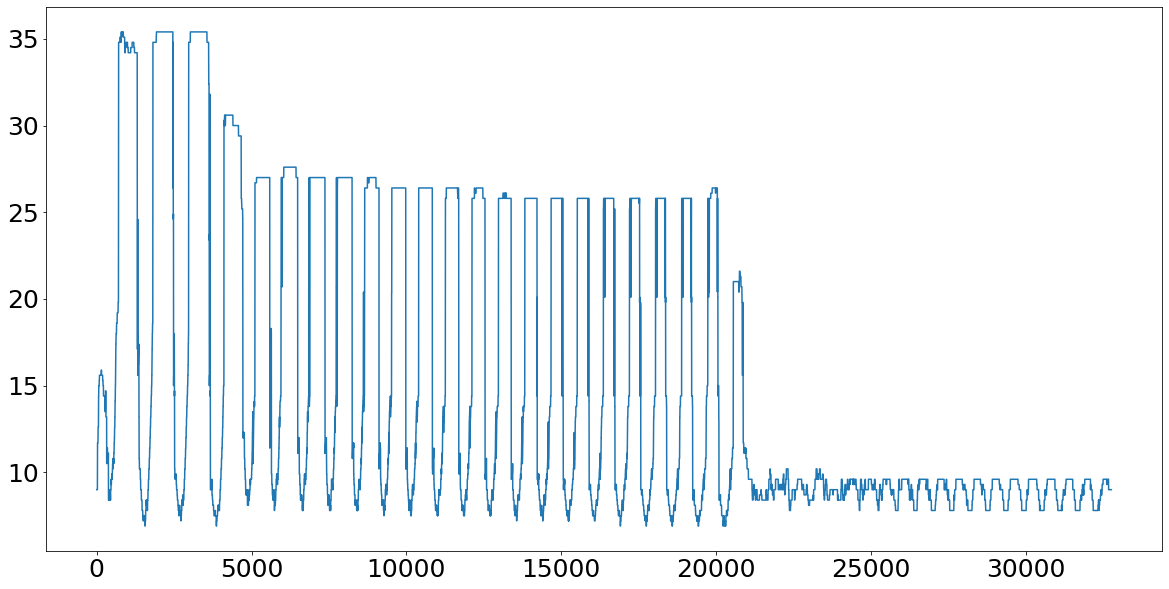

[21 21 21 ... 21 21 21]


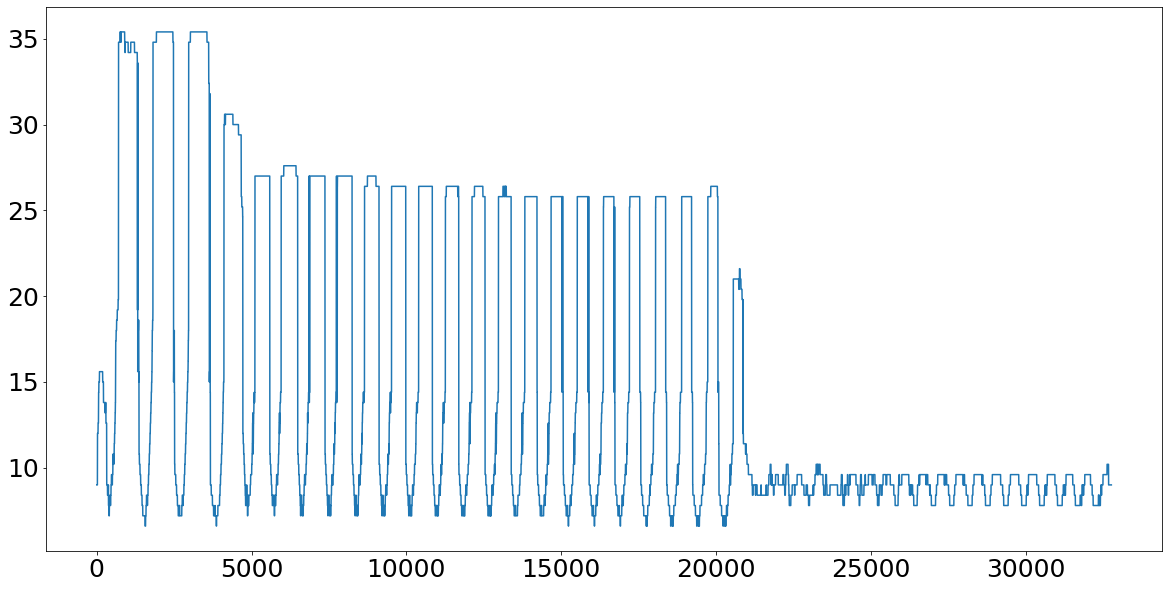

[32 33 33 ... 32 32 32]


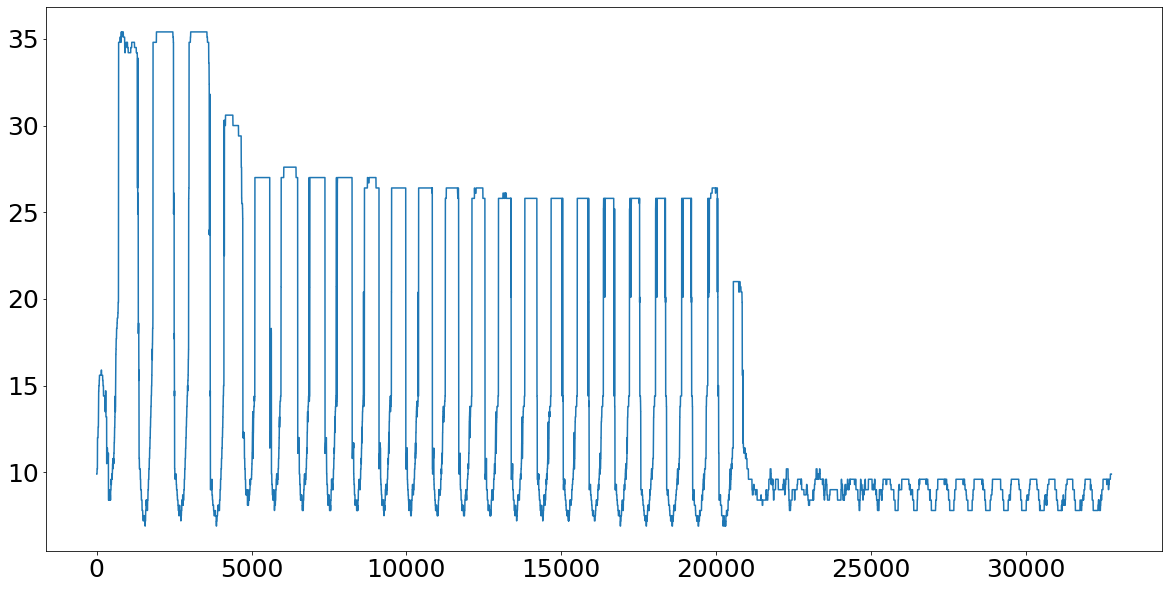

[12 12 12 ... 12 12 12]


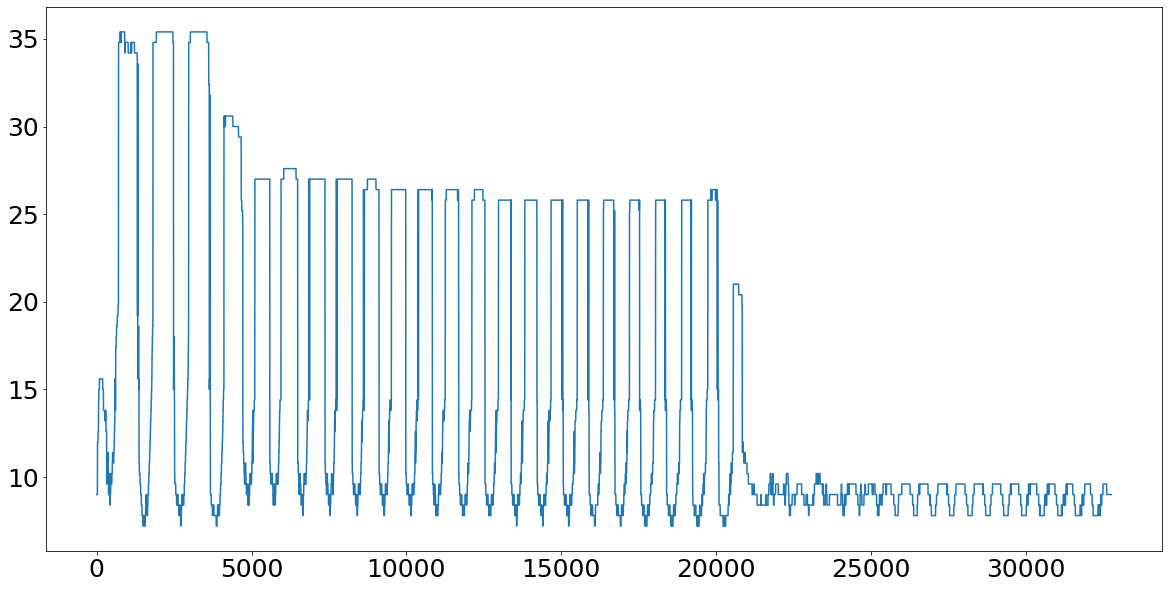

[2 2 2 ... 2 2 2]


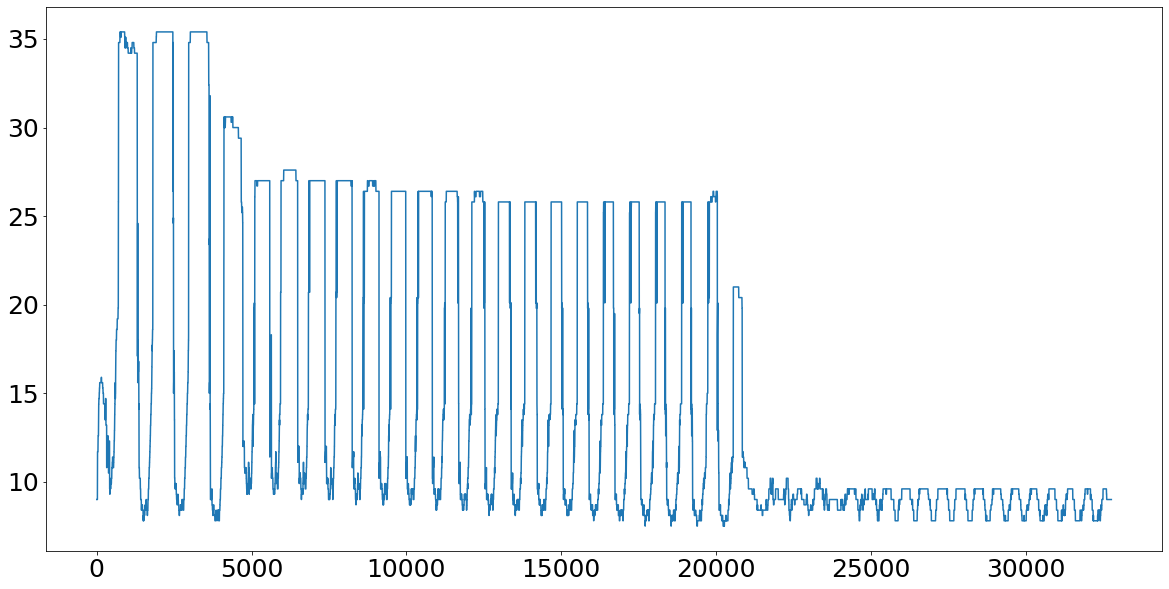

[13 14 14 ... 13 13 13]


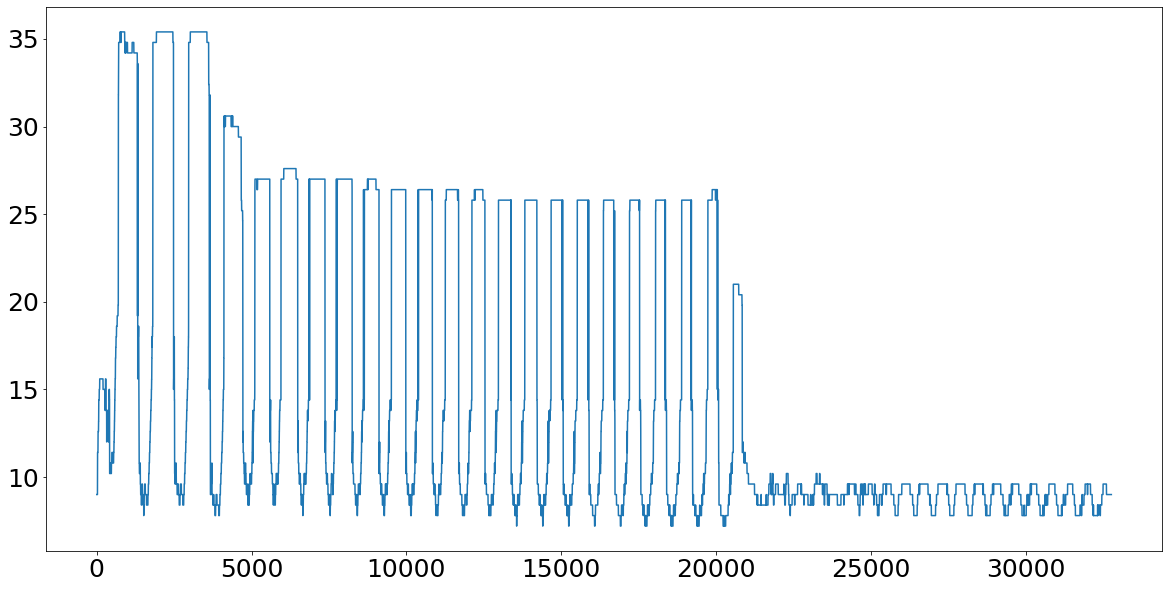

[31 31 31 ... 31 31 31]


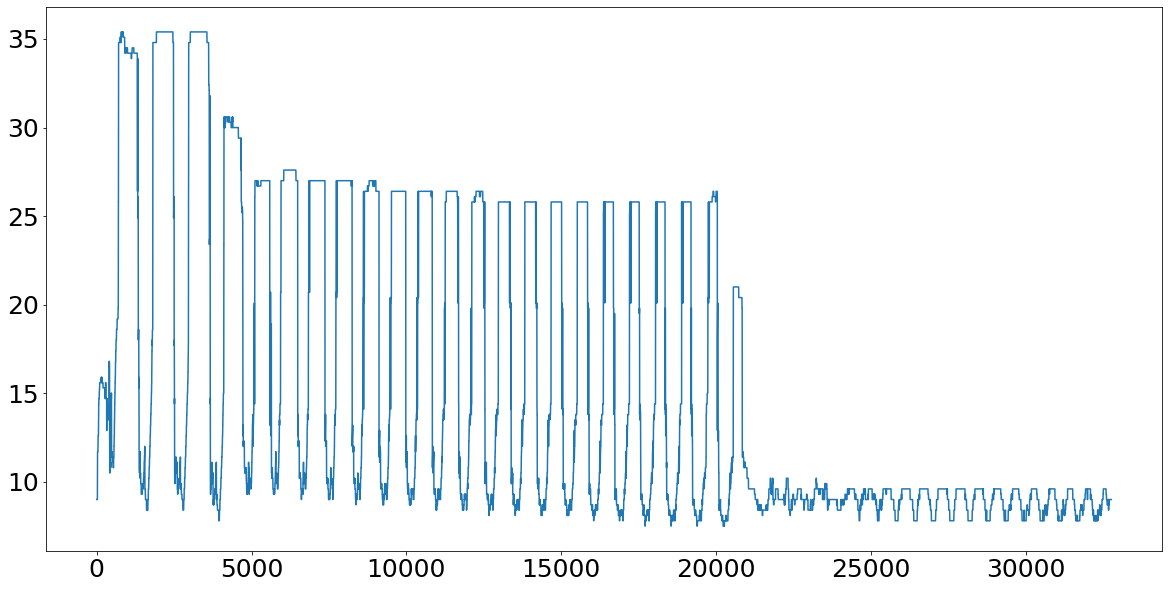

[15 15 15 ... 15 15 15]


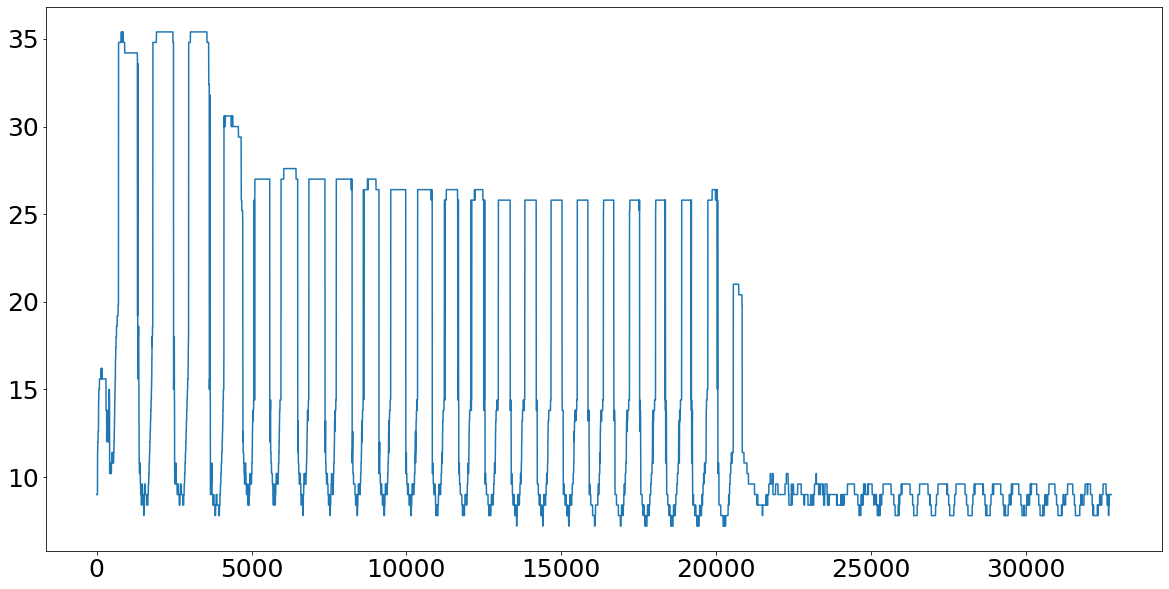

[4 4 4 ... 4 4 4]


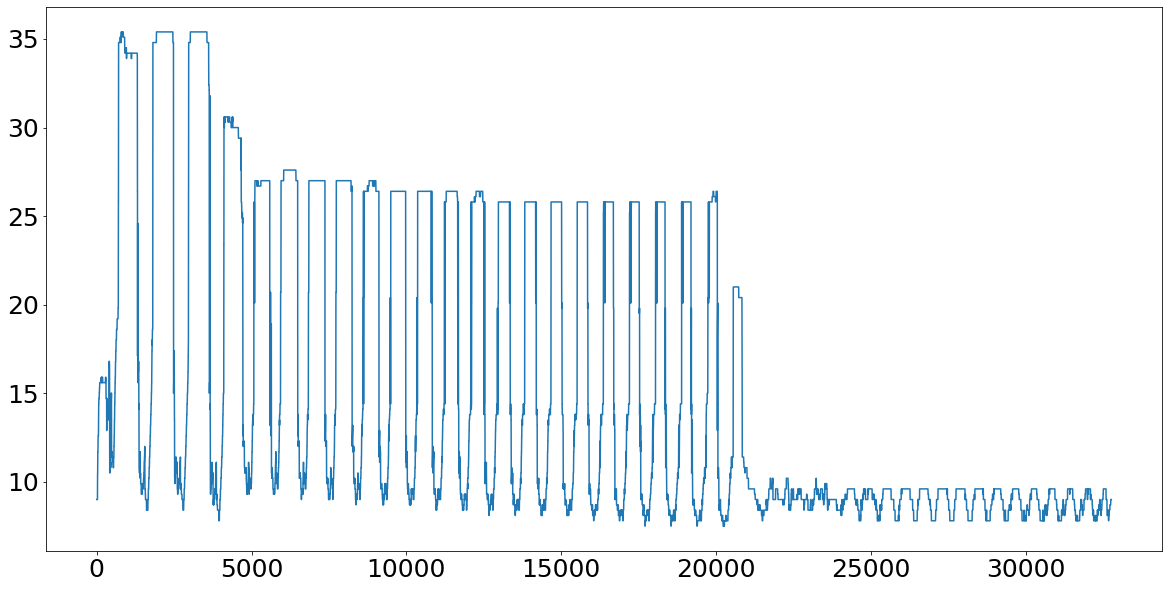

[56 56 56 ... 56 56 56]


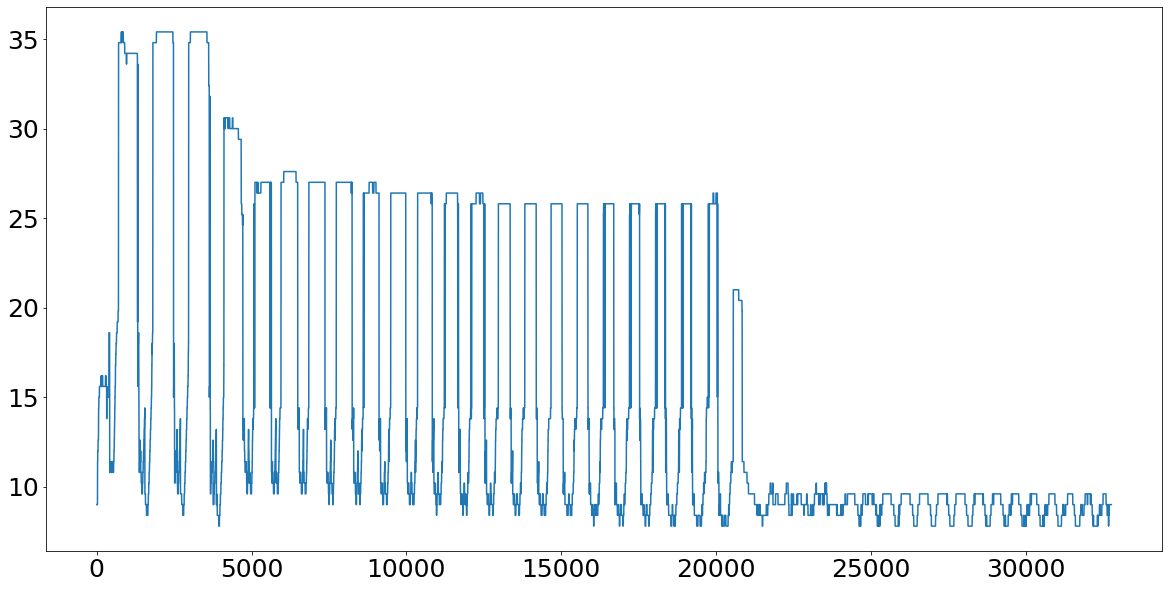

[13 13 13 ... 13 13 13]


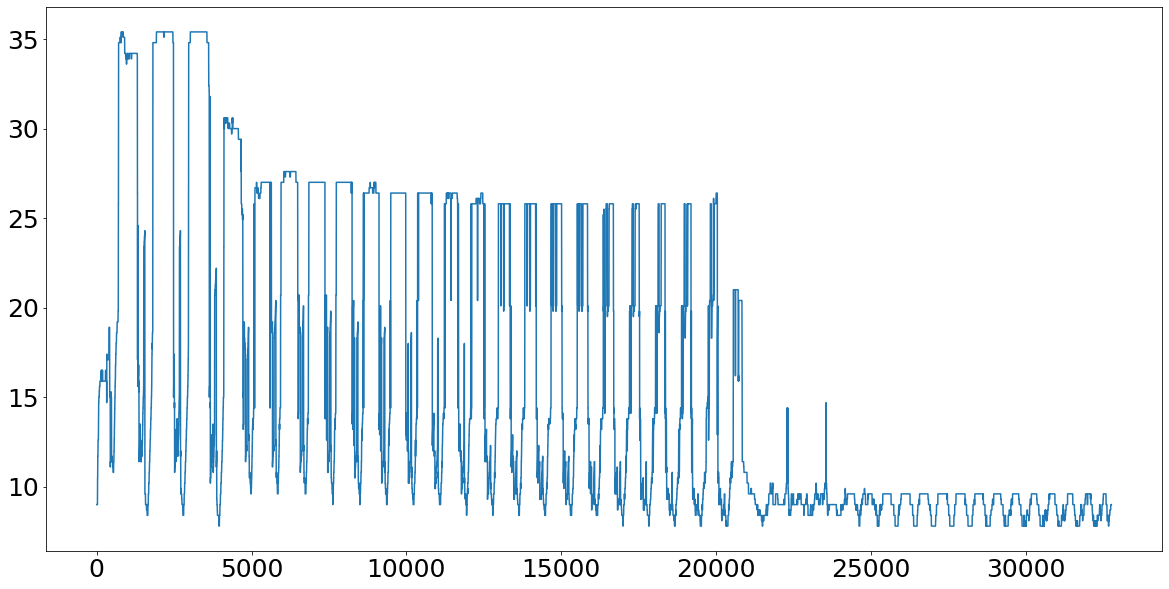

[13 13 13 ... 13 13 13]


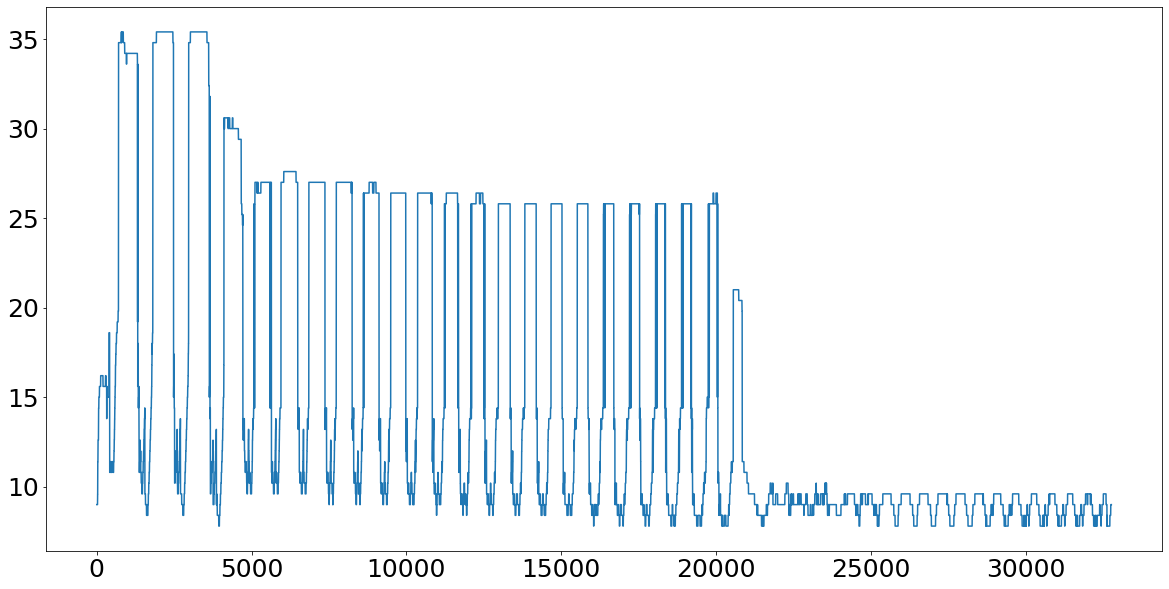

[12 12 12 ... 12 12 12]


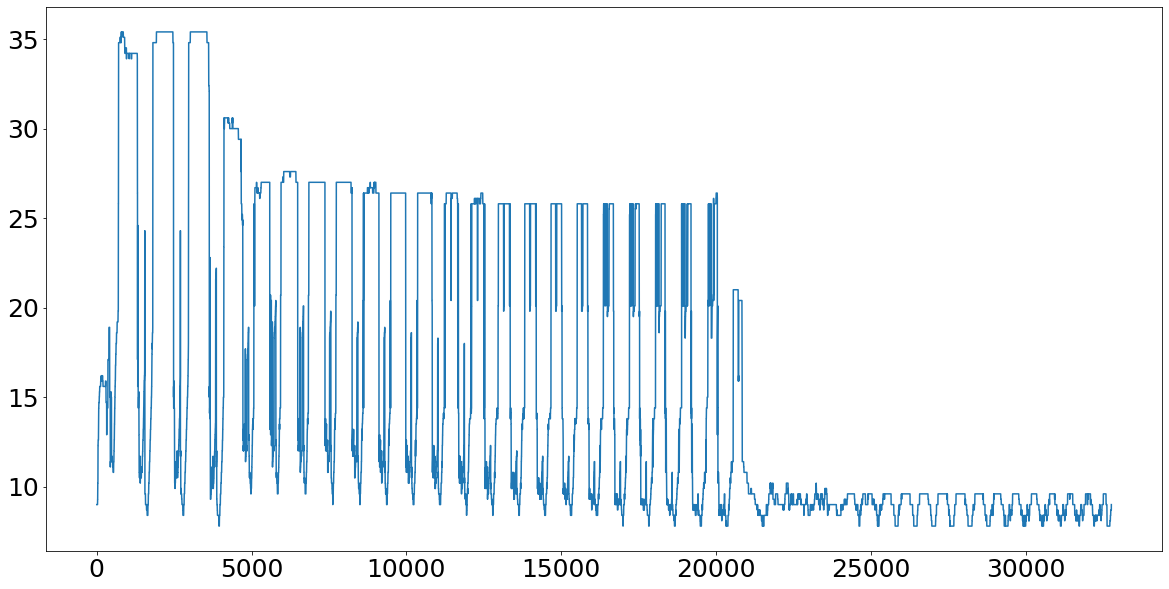

[12 12 12 ... 12 12 12]


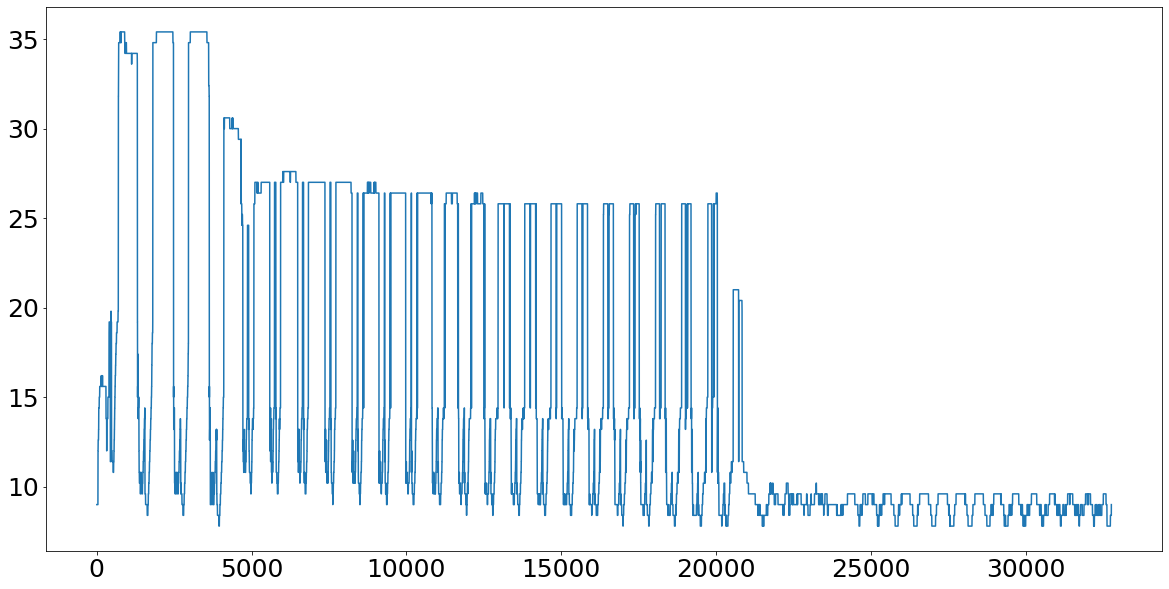

[12 12 12 ... 12 12 12]


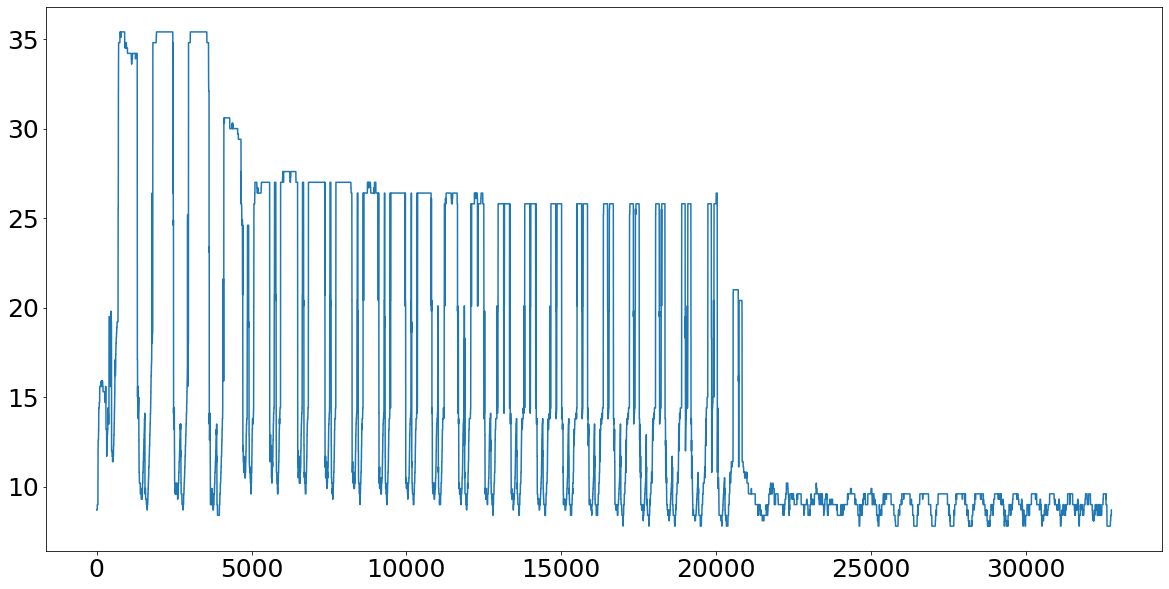

[14 14 14 ... 14 14 14]


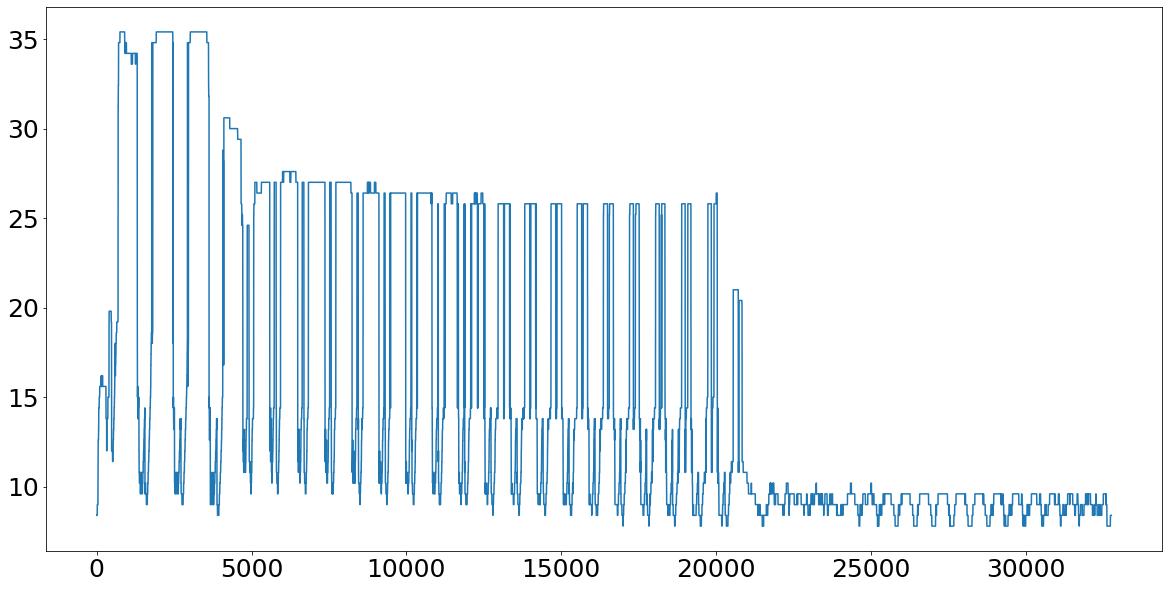

[20 20 20 ... 20 20 20]


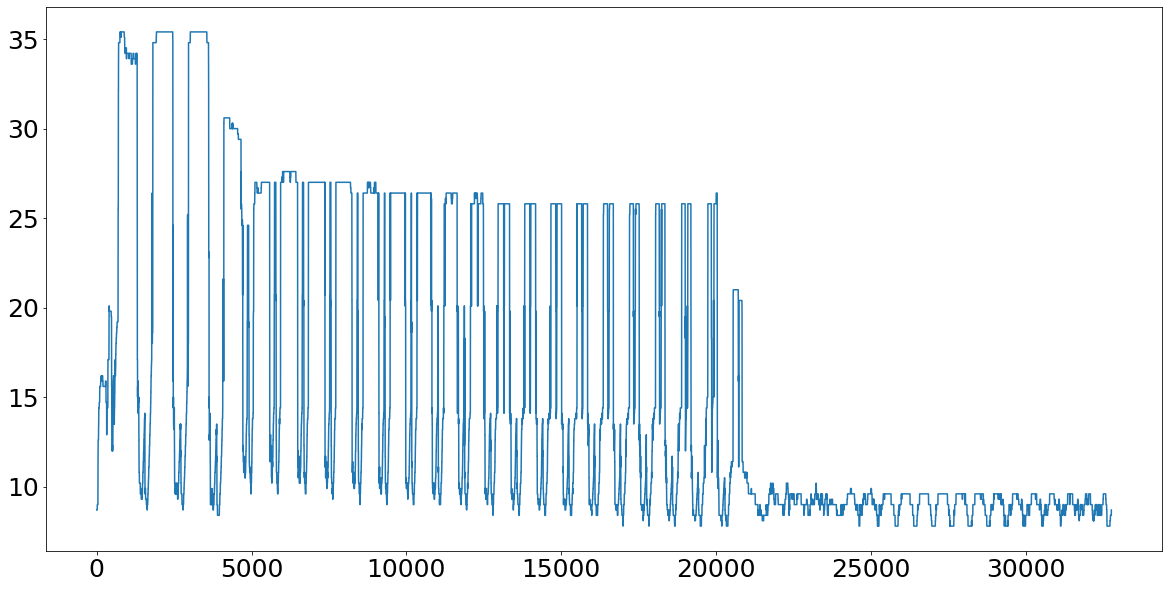

[16 16 16 ... 16 16 16]


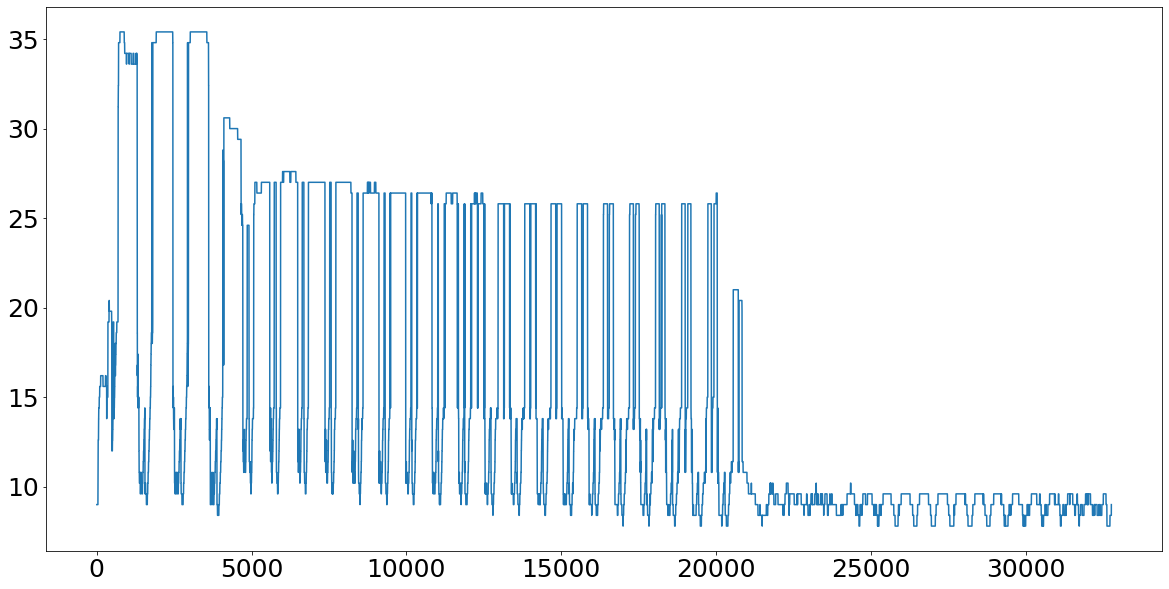

[55 55 55 ... 55 55 55]


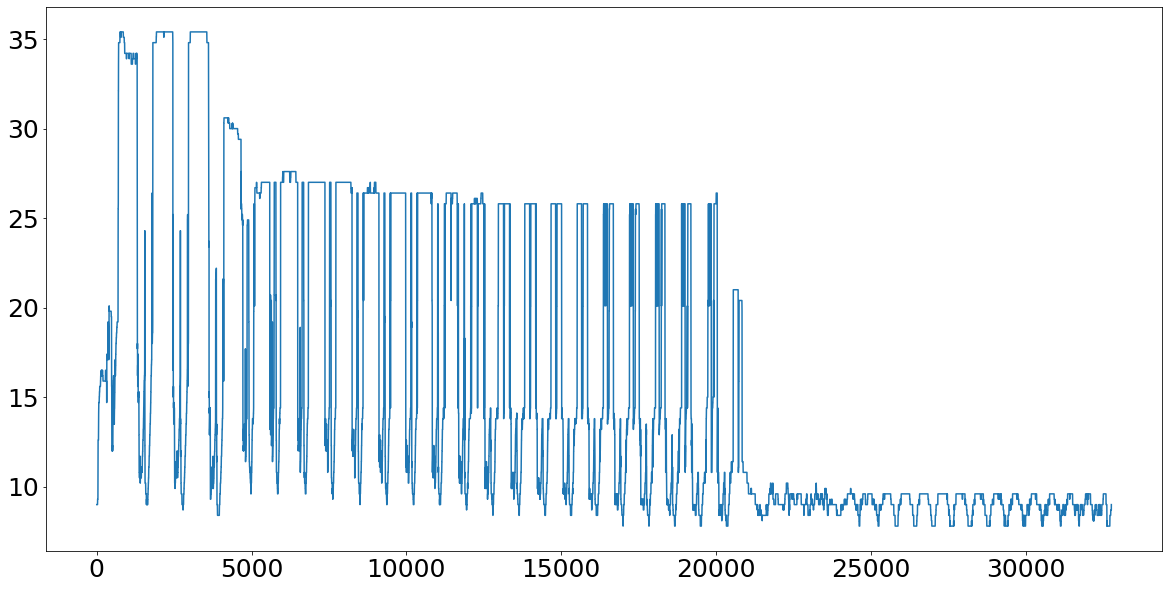

[13 13 13 ...  5 13 13]


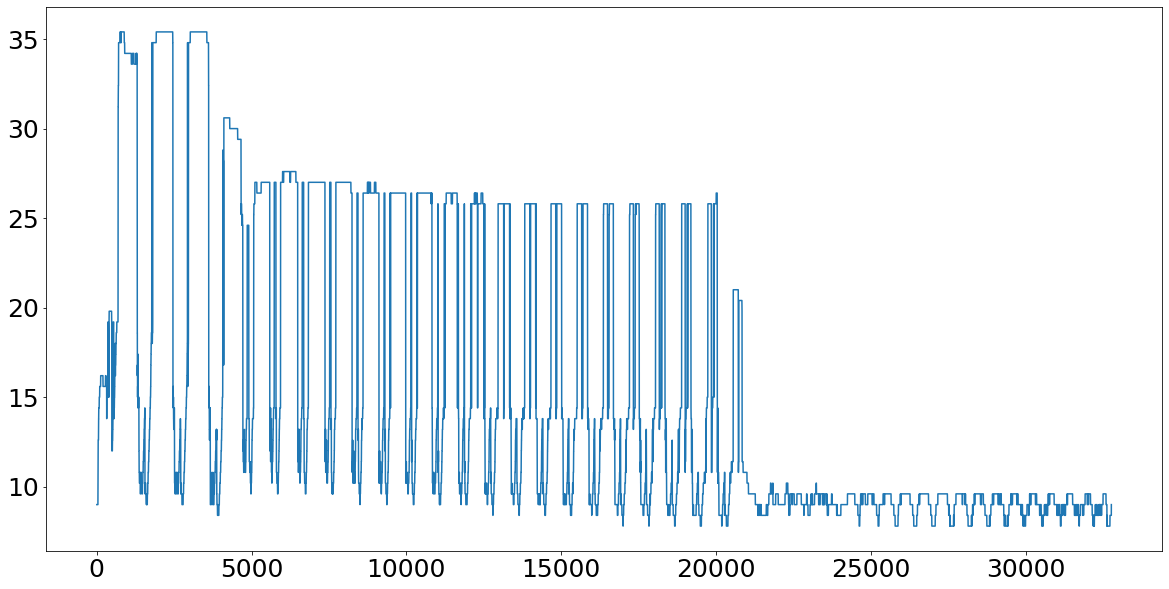

[17 17 17 ... 17 17 17]


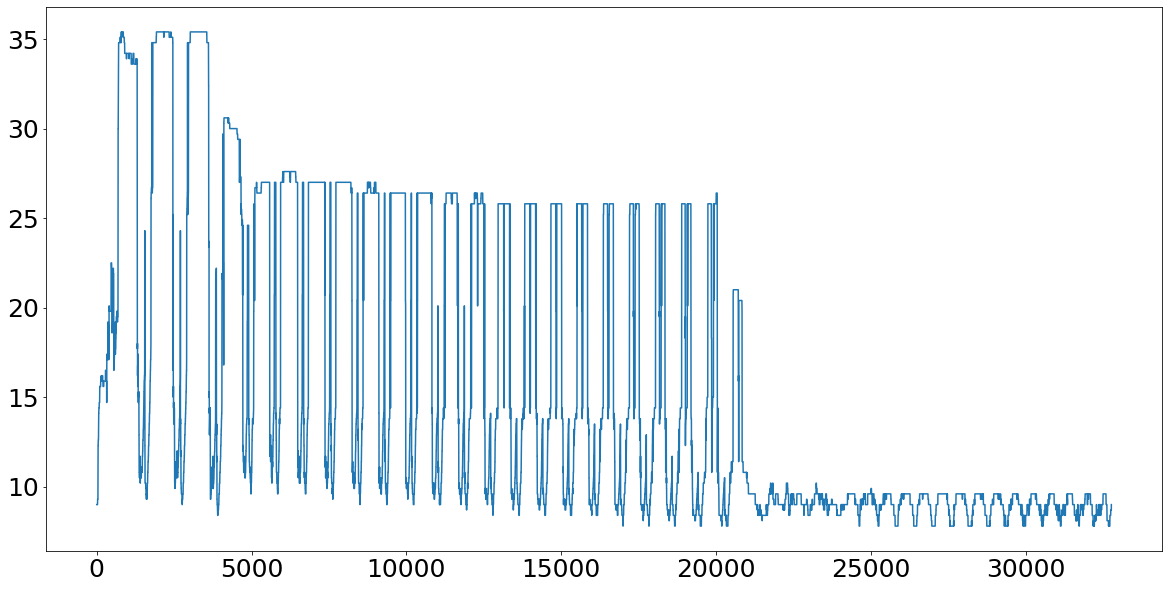

[12 12 12 ... 12 12 12]


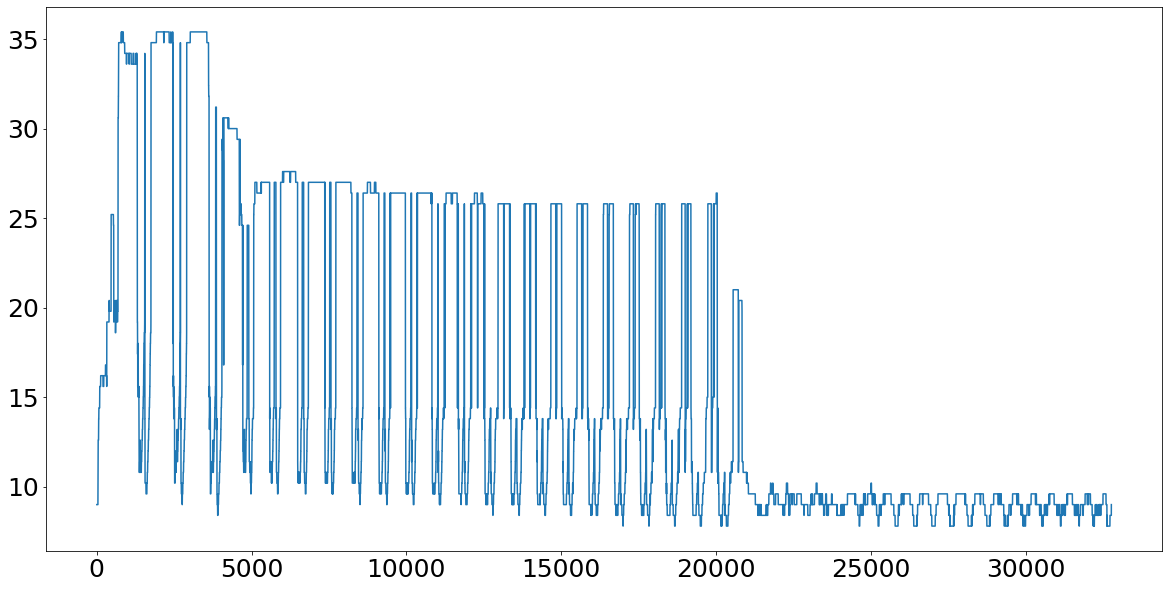

[17 17 18 ... 17 17 17]


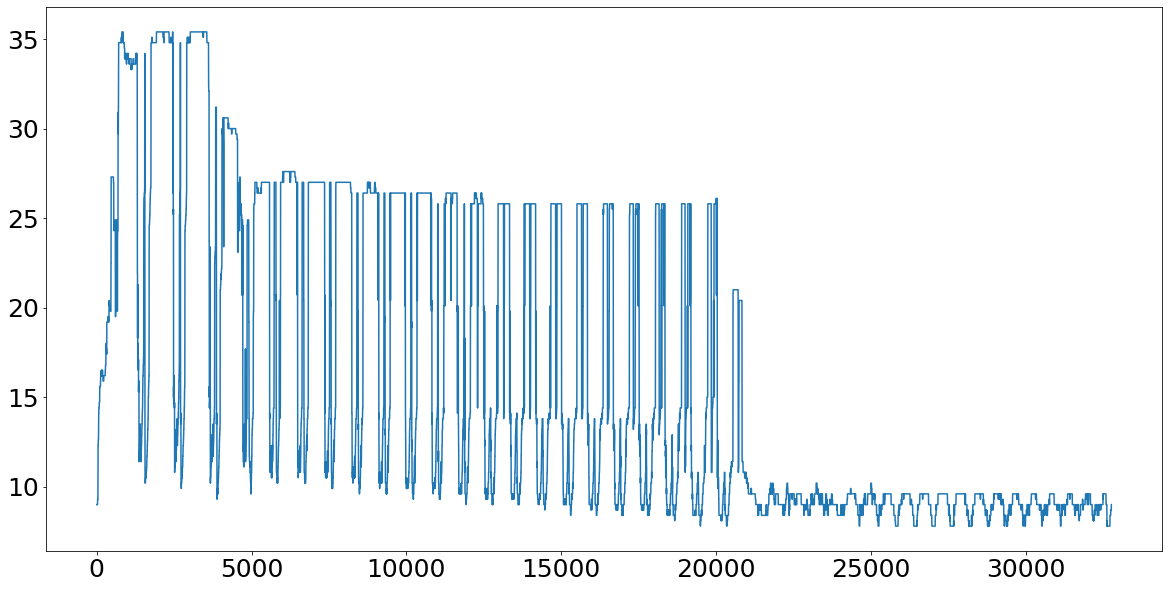

[40 40 40 ... 40 40 40]


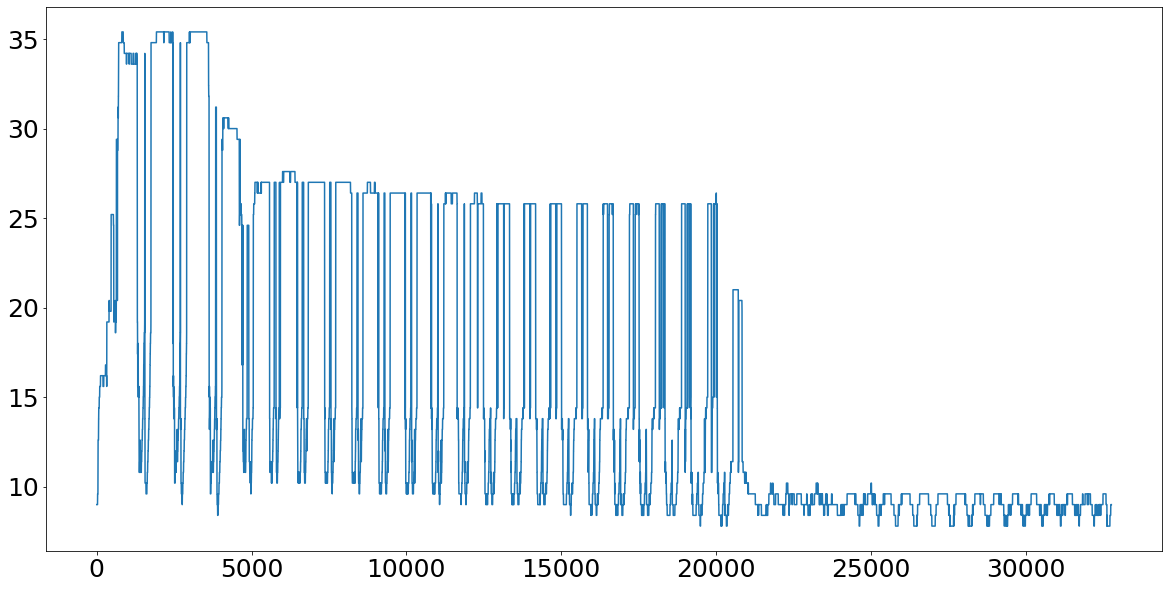

[56 56 56 ... 55 55 56]


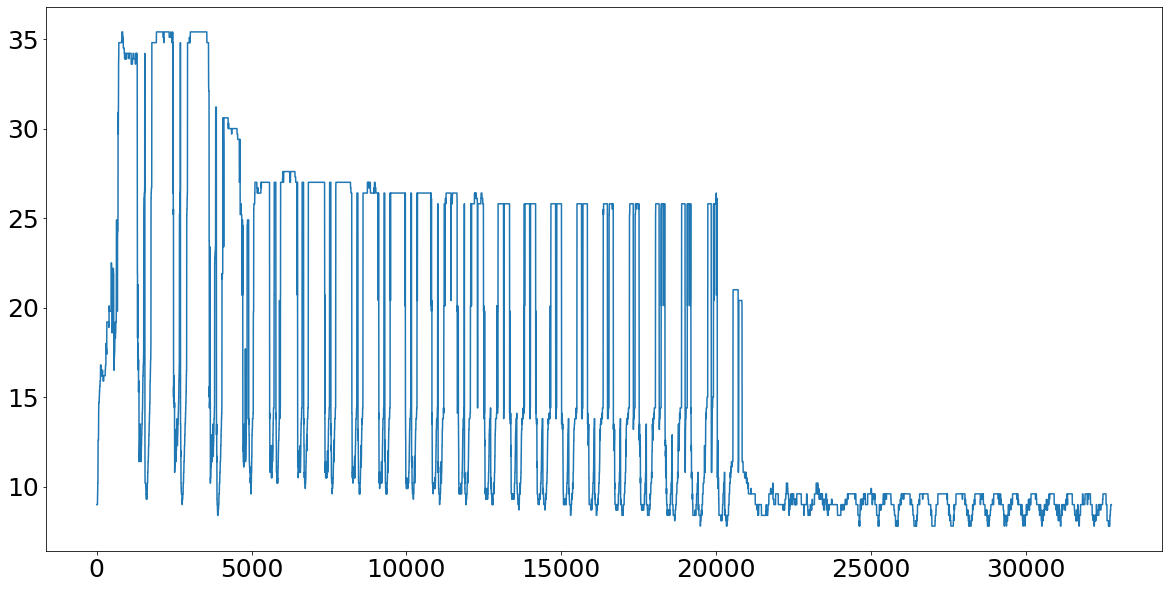

[20 20 20 ... 20 20 20]


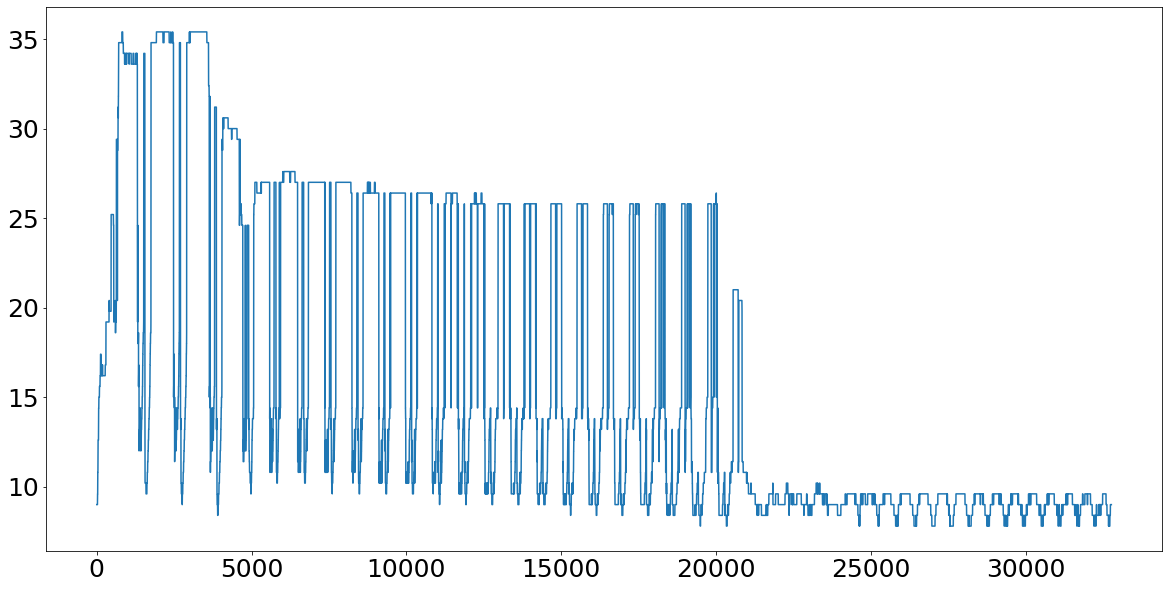

[ 4 13 13 ...  4  4  4]


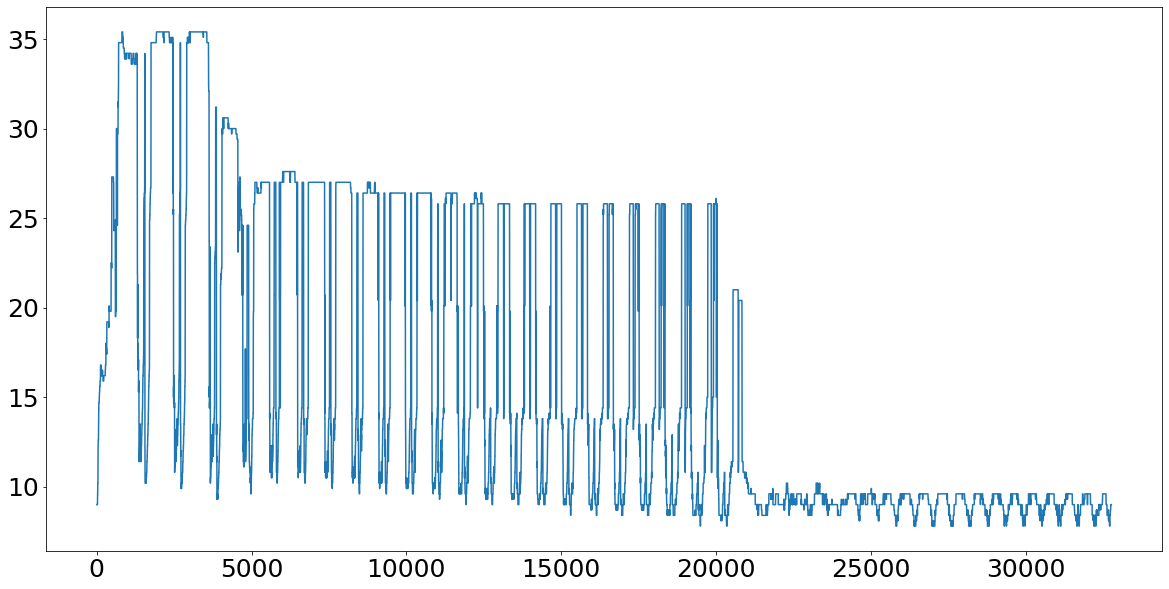

[44 44 44 ... 44 44 44]


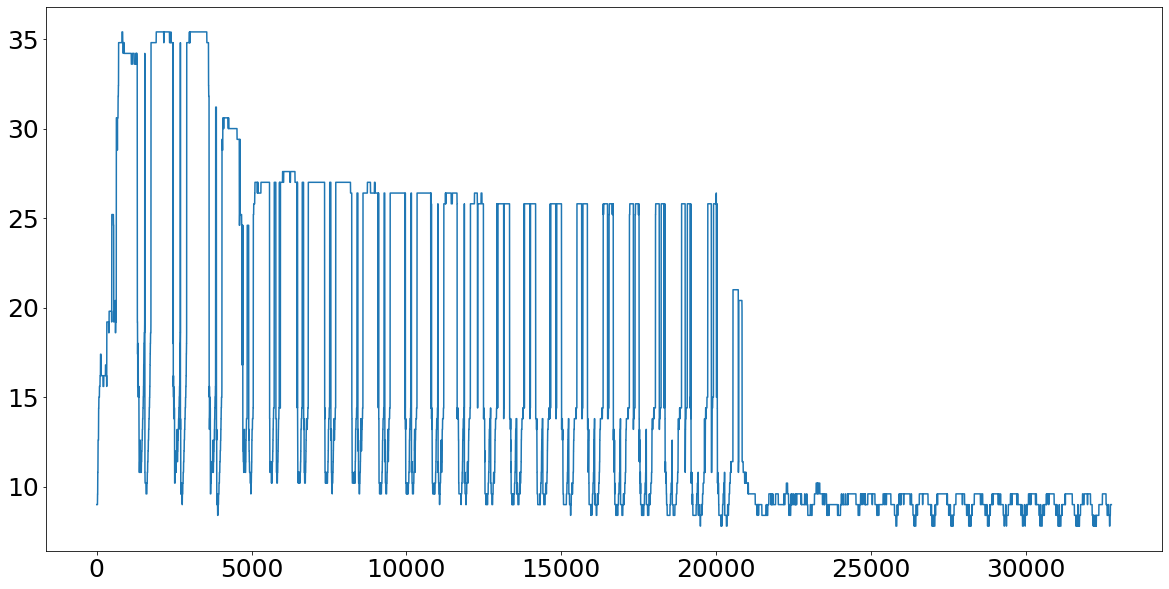

[12 12 12 ... 12 12 12]


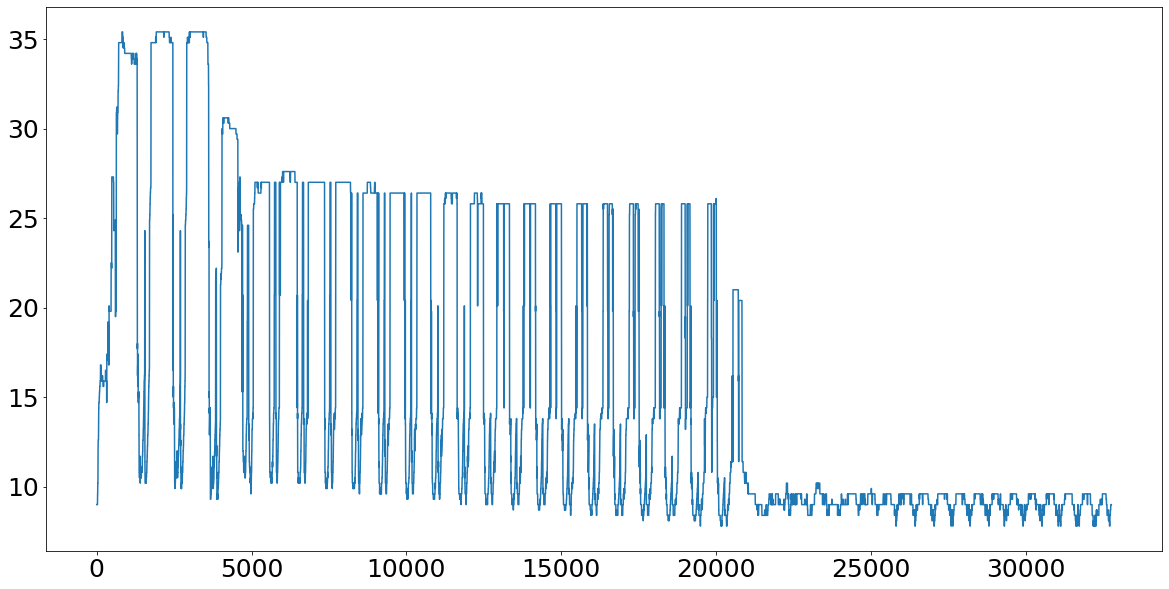

[55 55 55 ... 55 55 55]


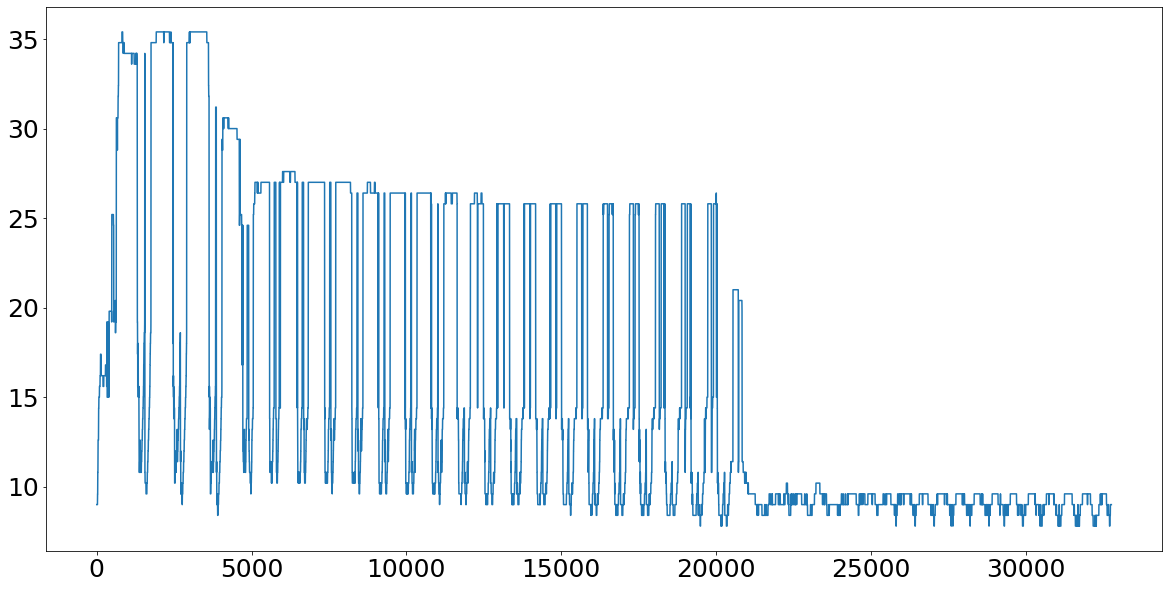

[12 12 12 ... 12 12 12]


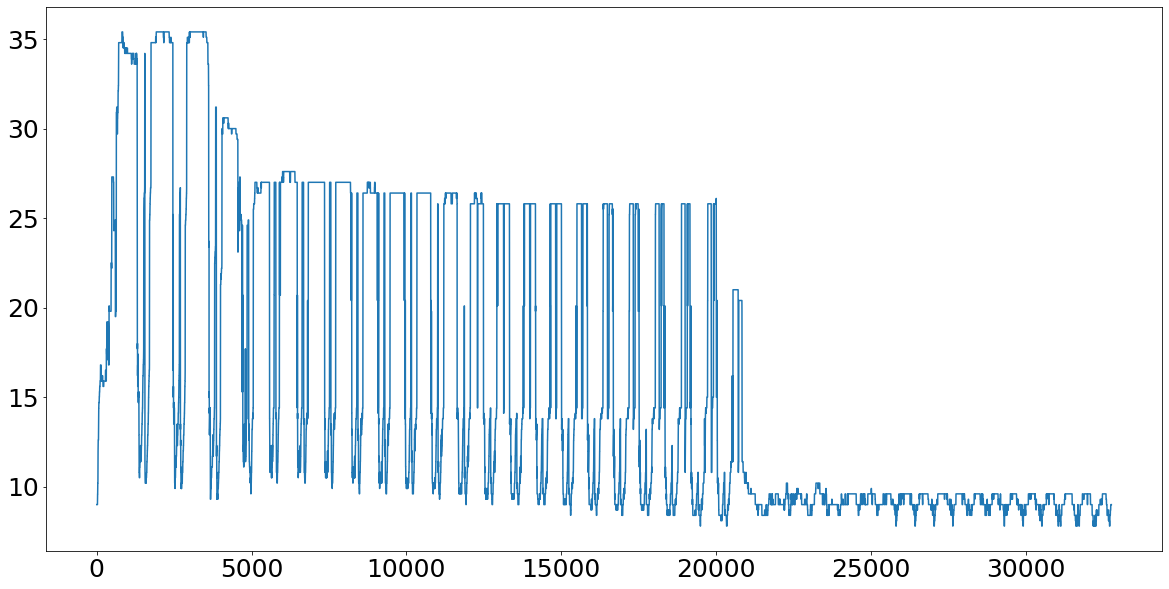

[13 13 13 ... 13 13 13]


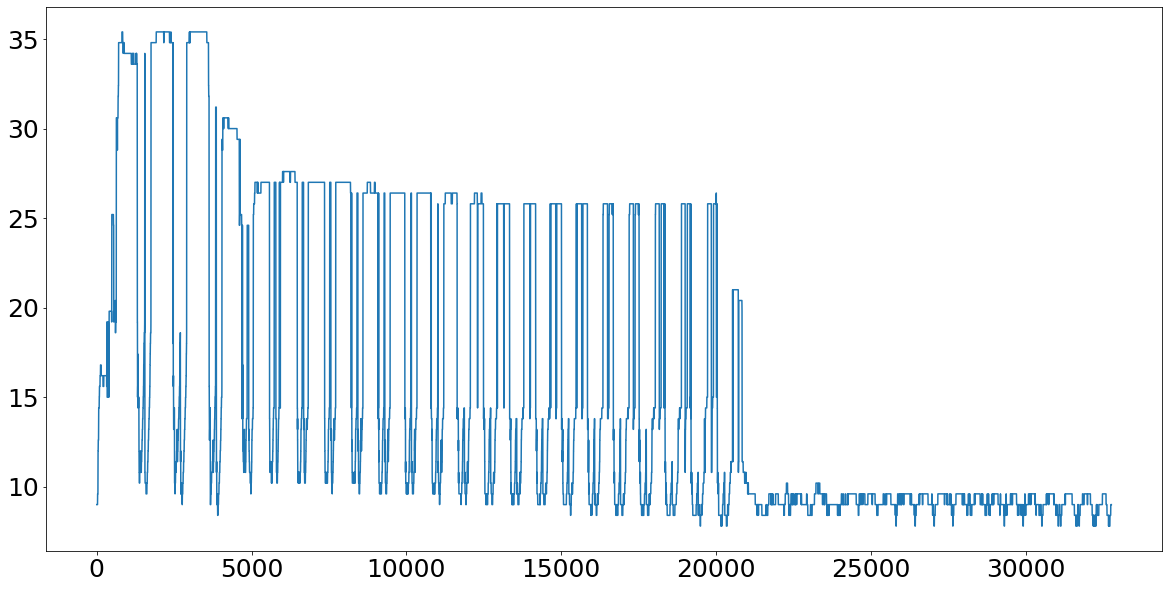

[31 31 31 ... 31 31 31]


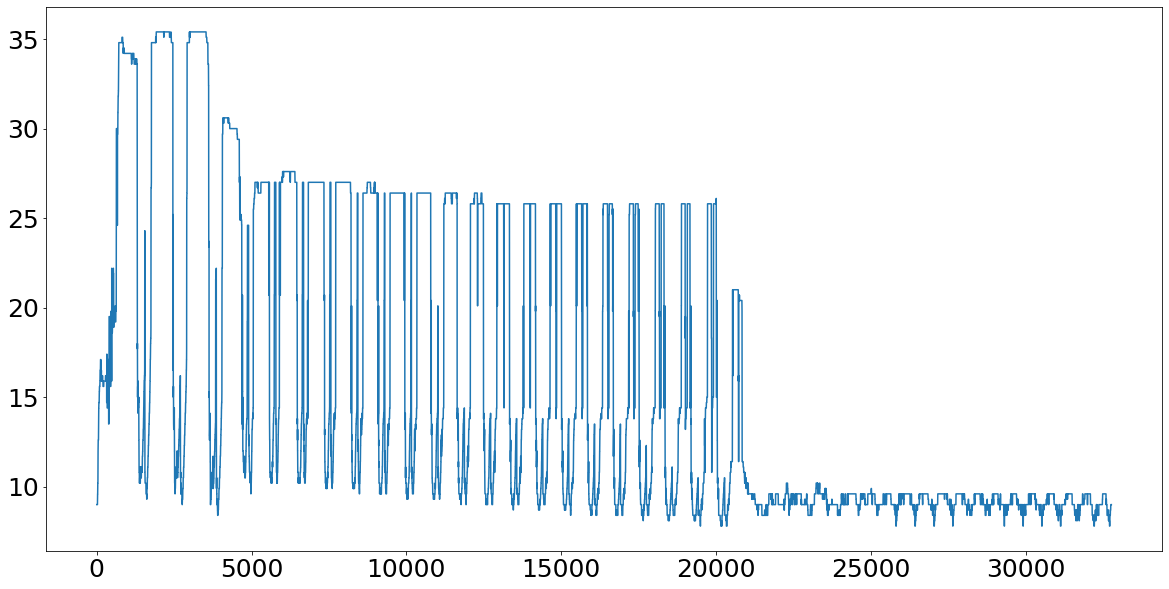

[12 12 12 ... 12 12 12]


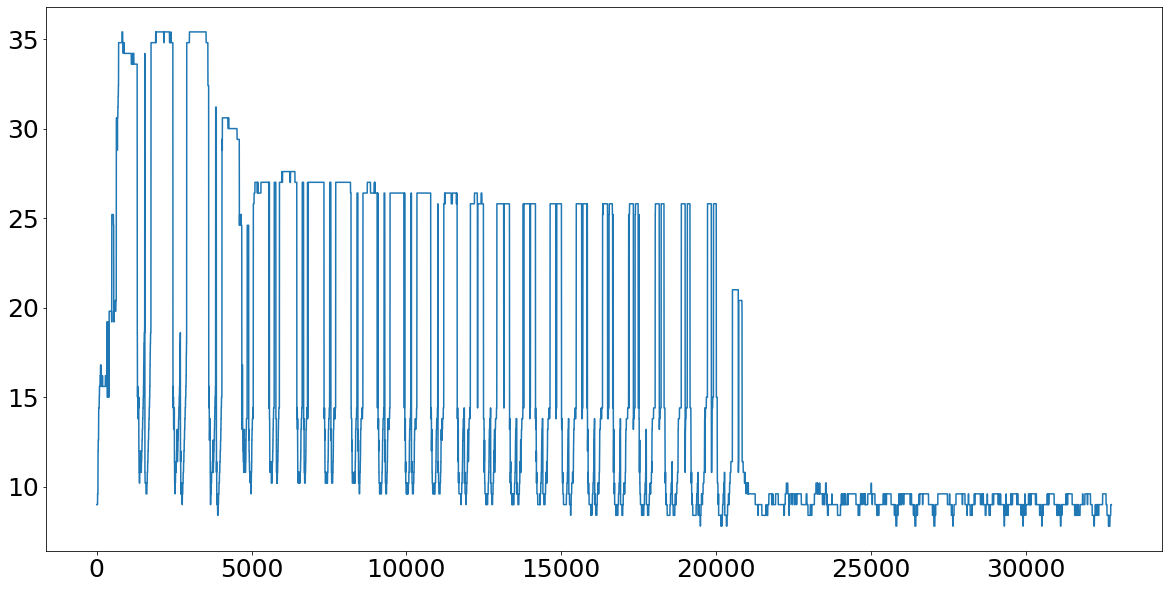

[ 9  9 21 ...  9  9  9]


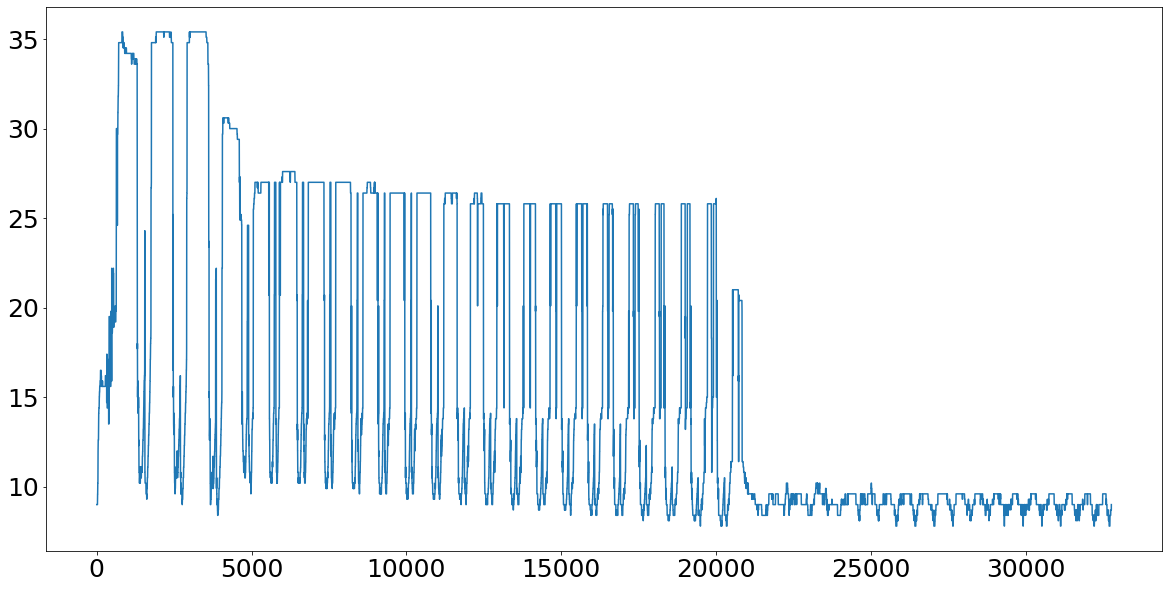

[12 12 12 ... 12 12 12]


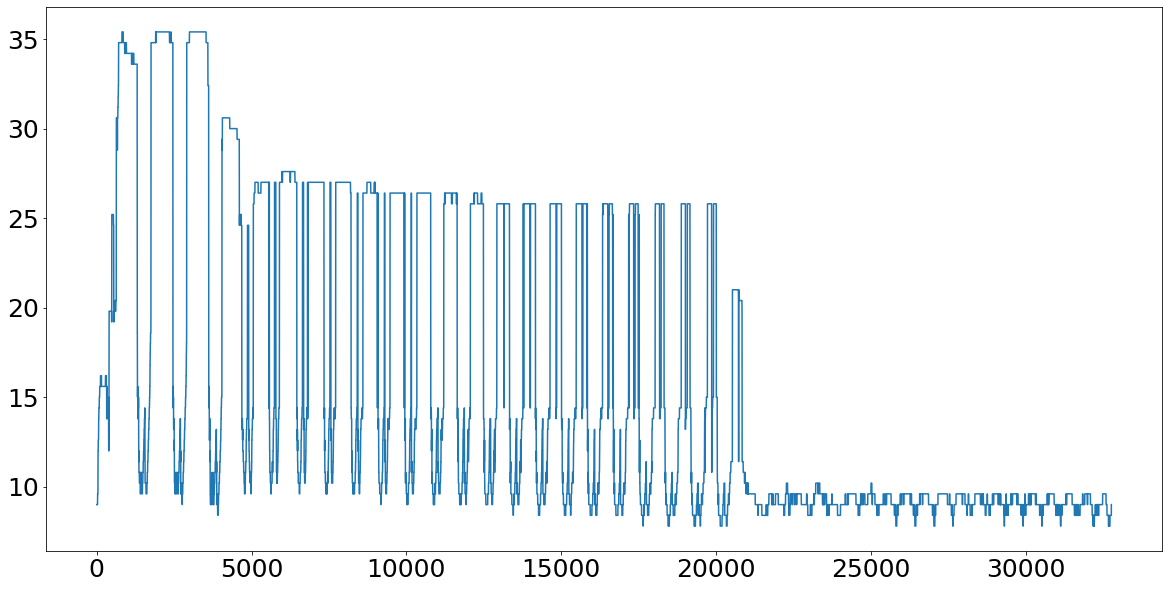

[13 13 13 ... 13 13 13]


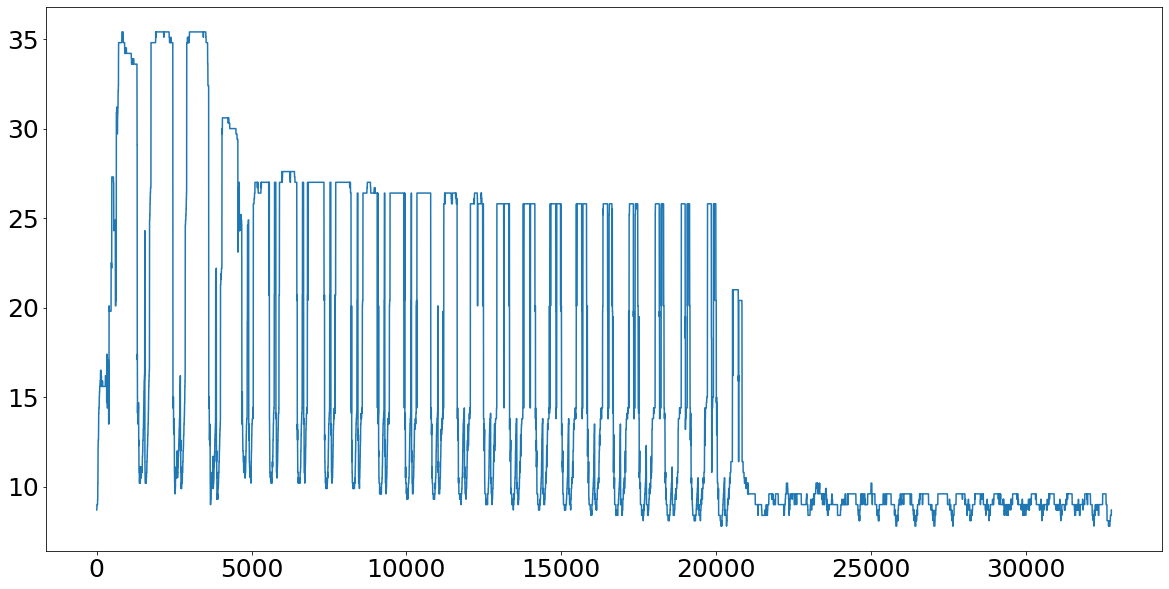

[19 19 19 ... 19 19 19]


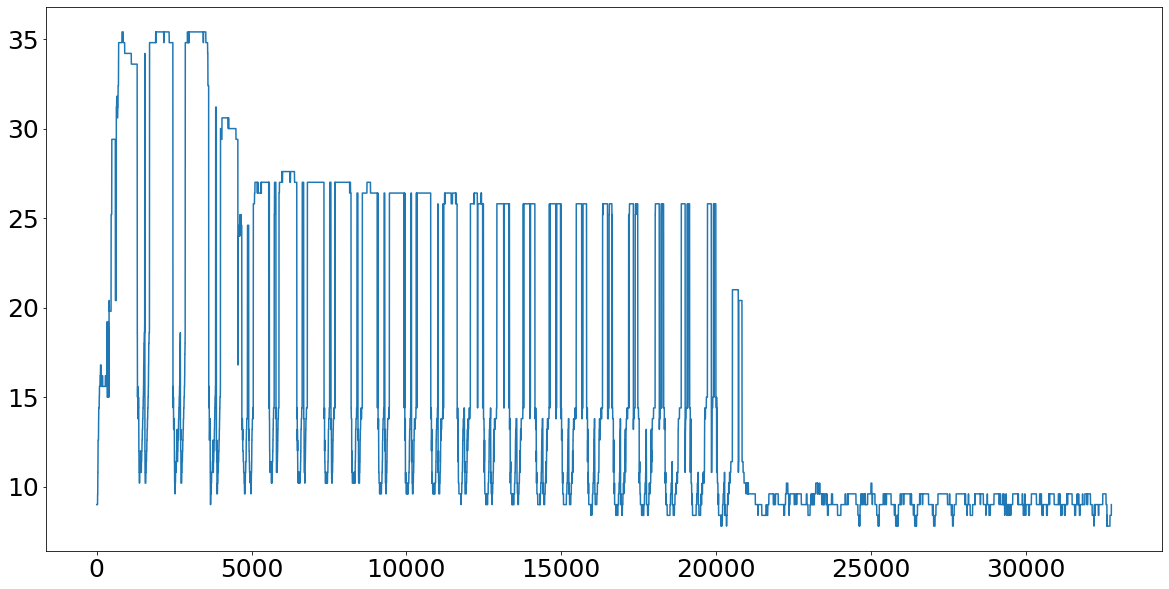

[15 15 15 ... 15 15 15]


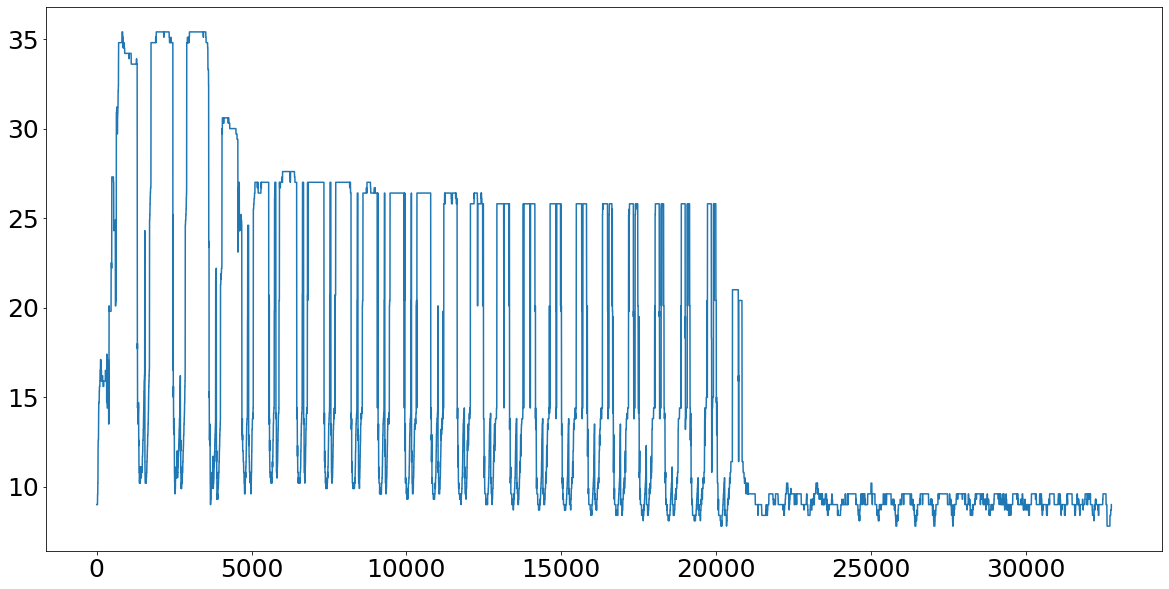

[6 6 6 ... 6 6 6]


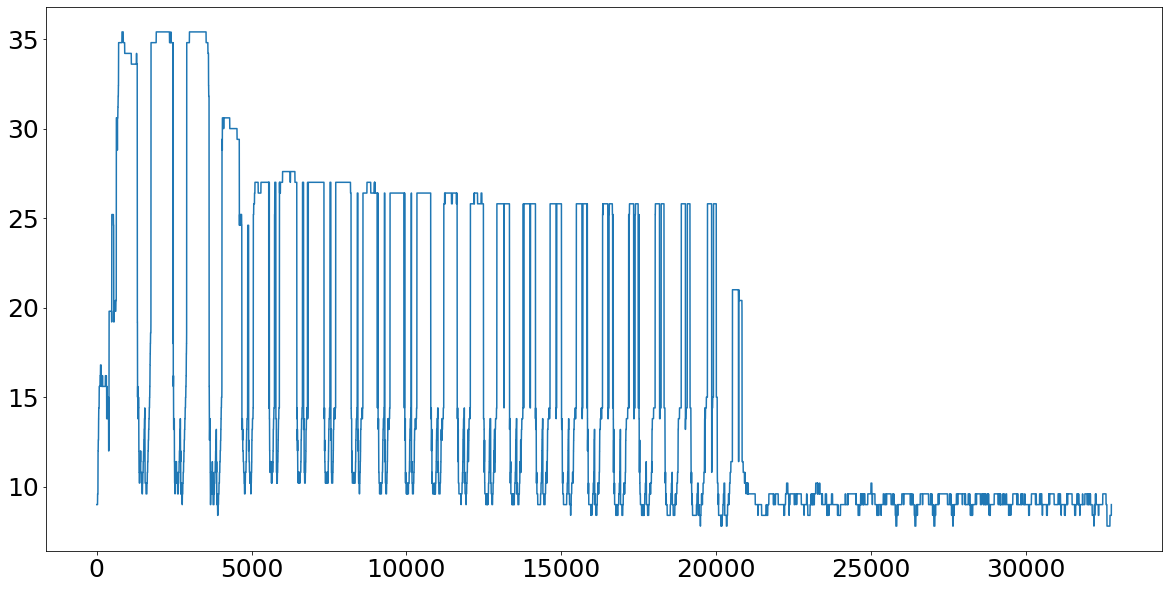

[54 54 54 ... 54 54 54]


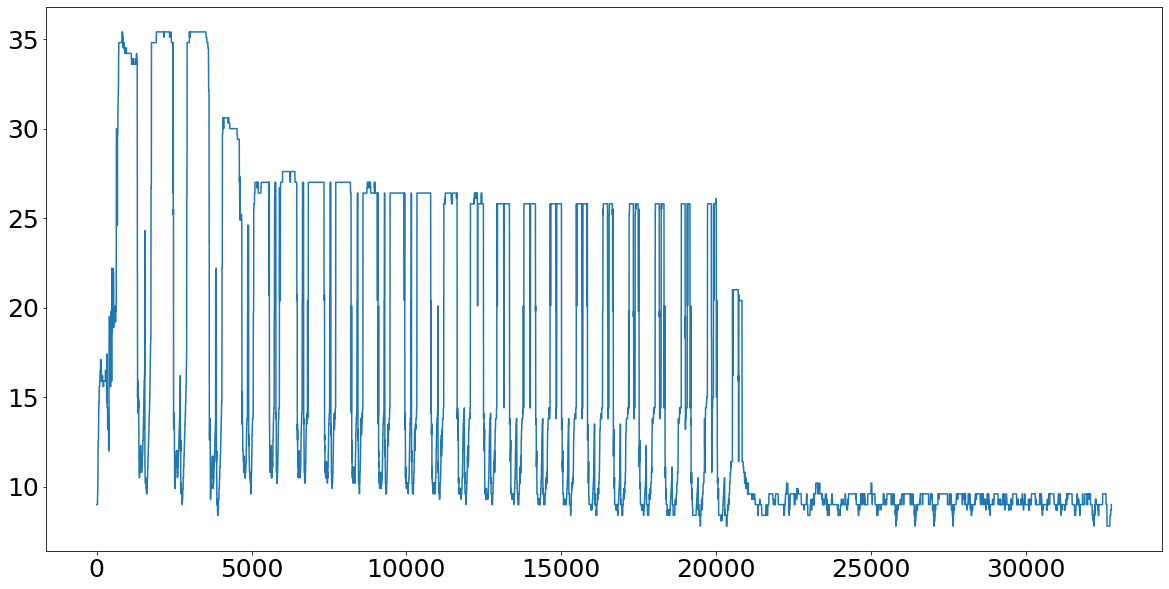

[12 12 12 ... 12 12 12]


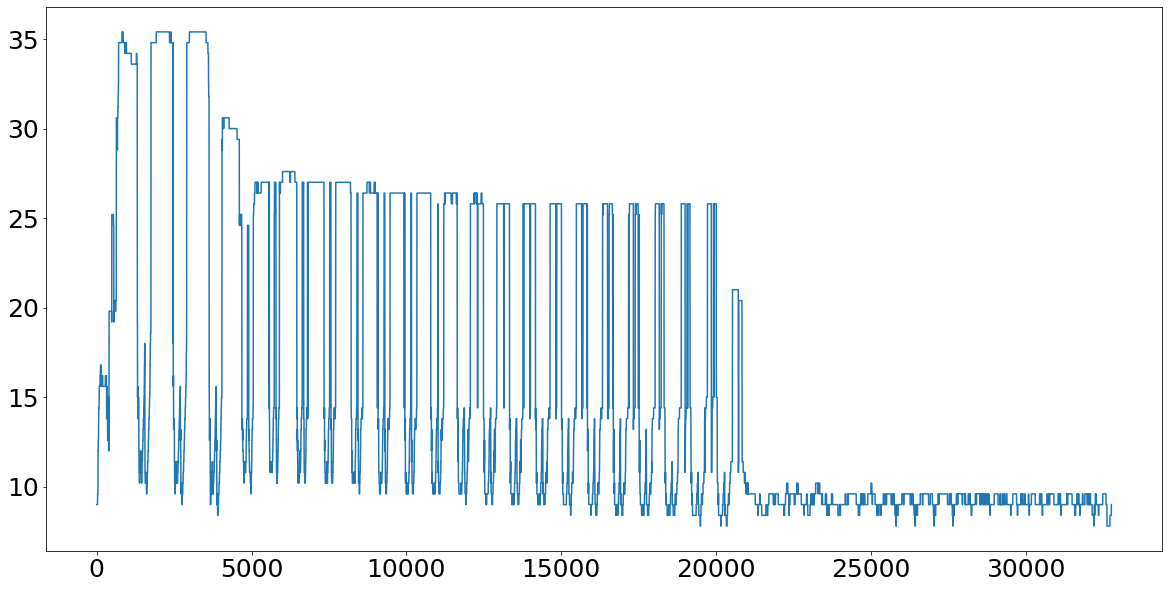

[32 32 32 ... 31 31 32]


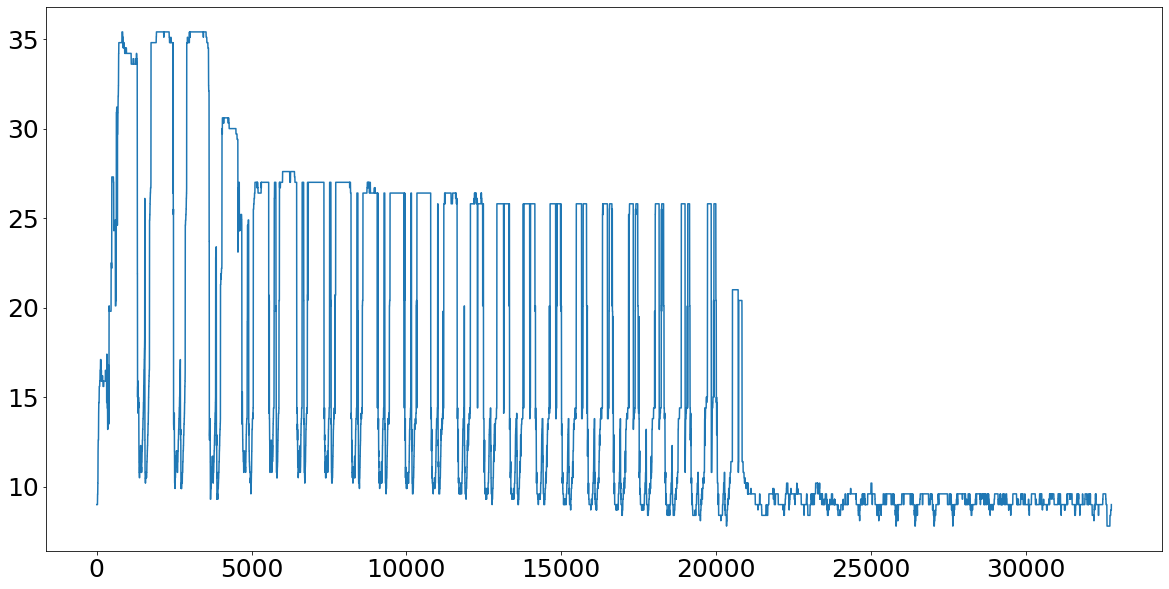

[14 14 14 ... 14 14 14]


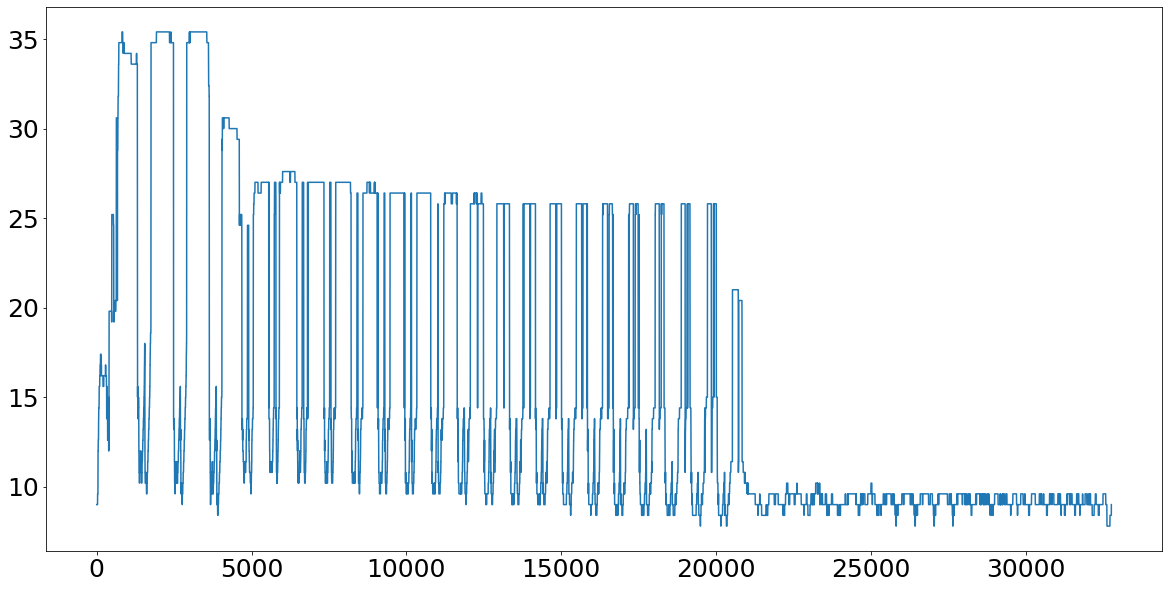

[12 12 12 ... 12 12 12]


KeyboardInterrupt: 

In [176]:
Bpb = 0.19 # синаптический параметр
Bbpmin = 0.06 # синаптический параметр
Bbpmax = 0.1 # синаптический параметр

a_gr_curr = None


args = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbpmin, vsl)
sol, t = calcODE(args, *(4 * np.random.random(6) - 2), 2000, 2**15)


while True:
    args1 = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbpmin, Bbpmax, vsl)
    sol, t = calcODE1(args1, *sol[np.random.randint(1000, 2000)], 2000, 2**15)

    scale = np.linspace(0, 60, 101)
    w = fftMorlet(t, sol[:, 0], scale, np.pi)

    print(np.argmax(np.abs(w), axis=0))
    a_gr = scale[np.argmax(np.abs(w), axis=0)]
    if a_gr_curr is None:
        a_gr_curr = a_gr[..., np.newaxis]
    else:
        a_gr_curr = np.concatenate([a_gr_curr, a_gr[..., np.newaxis]], axis=-1)
    
#     print(a_gr_curr.shape)
    
    plt.figure(figsize=(20, 10))
    plt.plot(np.median(a_gr_curr, axis=-1))
    plt.show()